# **Importing Datasets**

In [105]:
#Mounting Google Drive to the Colab environment

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
#Importing the various datasets as seperate dataframes

import pandas as pd

df_flight = pd.read_csv('/content/drive/MyDrive/NNDL Project Dataset (CIA)/maj us flight - january 2024.csv')
df_weather = pd.read_csv('/content/drive/MyDrive/NNDL Project Dataset (CIA)/weather_meteo_by_airport.csv')
df_airport = pd.read_csv('/content/drive/MyDrive/NNDL Project Dataset (CIA)/airports_geolocation.csv')
df_cancelled = pd.read_csv('/content/drive/MyDrive/NNDL Project Dataset (CIA)/Cancelled_Diverted_2023.csv')

# **Data Pre-processing**

### Cleaning DataFrame column names by trimming spaces, converting to lowercase, and replacing spaces with underscores.

In [107]:
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

df_flight = clean_column_names(df_flight)
df_weather = clean_column_names(df_weather)
df_airport = clean_column_names(df_airport)
df_cancelled = clean_column_names(df_cancelled)

In [108]:
df_flight.head()

,flightdate,day_of_week,airline,tail_number,dep_airport,dep_cityname,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,...,flight_duration,distance_type,delay_carrier,delay_weather,delay_nas,delay_security,delay_lastaircraft,manufacturer,model,aicraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


The **delay_**columns are numeric and represent delay durations in minutes due to different causes: carrier issues, weather, air traffic (NAS), security, or late arriving aircraft. A value of 0 means no delay from that cause. They're useful for analyzing total delay and understanding root causes behind flight disruptions.

**aircraft_age :**
Older aircraft are more prone to technical issues, maintenance checks, and slower operations, increasing the risk of delays. Airlines may assign older jets to lower-priority routes, further impacting timeliness. While not the sole cause, aircraft age is a valuable predictor when analyzing delay patterns and reliability in flight models.



In [109]:
df_weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE


In [110]:
df_airport.head()

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [111]:
df_cancelled.head()

,flightdate,day_of_week,airline,tail_number,cancelled,diverted,dep_airport,dep_cityname,deptime_label,dep_delay,...,arr_cityname,arr_delay,arr_delay_type,flight_duration,distance_type,delay_carrier,delay_weather,delay_nas,delay_security,delay_lastaircraft
0,2023-01-25,3,Endeavor Air,N691CA,1.0,0.0,JFK,"New York, NY",Evening,0.0,...,"Ithaca/Cortland, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
1,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,MSP,"Minneapolis, MN",Morning,0.0,...,"Pittsburgh, PA",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
2,2023-01-03,2,Endeavor Air,N937XJ,1.0,0.0,PIT,"Pittsburgh, PA",Afternoon,0.0,...,"Minneapolis, MN",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
3,2023-01-11,3,Endeavor Air,N926XJ,1.0,0.0,BWI,"Baltimore, MD",Afternoon,0.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
4,2023-01-25,3,Endeavor Air,N335PQ,0.0,1.0,BWI,"Baltimore, MD",Afternoon,2.0,...,"New York, NY",0.0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


## Null Value Check

In [112]:
#Dictionary of all dataframes
dfs = {
    "df_flight": df_flight,
    "df_weather": df_weather,
    "df_airport": df_airport,
    "df_cancelled": df_cancelled
}

#Print number of null values in each column
for name, df in dfs.items():
    print(f"\nMissing values in {name}:")
    print(df.isnull().sum())


Missing values in df_flight:
flightdate            0
day_of_week           0
airline               0
tail_number           0
dep_airport           0
dep_cityname          0
deptime_label         0
dep_delay             0
dep_delay_tag         0
dep_delay_type        0
arr_airport           0
arr_cityname          0
arr_delay             0
arr_delay_type        0
flight_duration       0
distance_type         0
delay_carrier         0
delay_weather         0
delay_nas             0
delay_security        0
delay_lastaircraft    0
manufacturer          0
model                 0
aicraft_age           0
dtype: int64

Missing values in df_weather:
time          0
tavg          0
tmin          0
tmax          0
prcp          0
snow          0
wdir          0
wspd          0
pres          0
airport_id    0
dtype: int64

Missing values in df_airport:
iata_code    0
airport      0
city         0
state        0
country      0
latitude     0
longitude    0
dtype: int64

Missing values in df_cancel

**This dataset contains no missing values and appears to be well-organized and clean.**

# **Dataframe wise preprocessing and cleaning**

## 1. df_flight

This dataset contains structured records of commercial U.S. flights for January 2024. It includes fields like flight date, airline, aircraft tail number, origin/destination airports, delay durations, and categorized delay reasons. The data enables temporal, airline-level, and aircraft-level analysis and can be merged with weather or airport datasets for deeper insights.

In [113]:
#Identifies and prints all duplicate rows (including originals), removes them, and confirms the dataset is clean.

# Total duplicated rows including originals
num_duplicates_total = df_flight.duplicated(keep=False).sum()
print(f" Total rows involved in duplication (including originals): {num_duplicates_total}")

# Display all rows that are duplicates (including the first occurrence)
dupes = df_flight[df_flight.duplicated(keep=False)]
print("\n Duplicate Rows (including originals):")
print(dupes)

# Drop duplicates
df_flight.drop_duplicates(inplace=True)

# Confirm no duplicates remain
num_duplicates = df_flight.duplicated().sum()
print(f"\n Total duplicate rows in df_flight after dropping: {num_duplicates}")

 Total rows involved in duplication (including originals): 6

 Duplicate Rows (including originals):
        flightdate  day_of_week                 airline tail_number  \
303832  2023-01-11            3  Southwest Airlines Co.      N8790Q   
303833  2023-01-11            3  Southwest Airlines Co.      N8790Q   
307246  2023-01-12            4  Southwest Airlines Co.      N8715Q   
307247  2023-01-12            4  Southwest Airlines Co.      N8715Q   
345834  2023-01-23            1  Southwest Airlines Co.      N8715Q   
345835  2023-01-23            1  Southwest Airlines Co.      N8715Q   

       dep_airport  dep_cityname deptime_label  dep_delay  dep_delay_tag  \
303832         HNL  Honolulu, HI       Morning          0              0   
303833         HNL  Honolulu, HI       Morning          0              0   
307246         HNL  Honolulu, HI       Morning         -2              0   
307247         HNL  Honolulu, HI       Morning         -2              0   
345834         HNL  H

In [114]:
#Convert FlightDate to datetime

#Initially, the flightdate column was of object type, so we need to convert it to datetime for accurate analysis.

df_flight['flightdate'] = pd.to_datetime(df_flight['flightdate'], errors='coerce')
print(df_flight.head())
print(df_flight['flightdate'].dtypes)

  flightdate  day_of_week       airline tail_number dep_airport  dep_cityname  \
0 2023-01-02            1  Endeavor Air      N605LR         BDL  Hartford, CT   
1 2023-01-03            2  Endeavor Air      N605LR         BDL  Hartford, CT   
2 2023-01-04            3  Endeavor Air      N331PQ         BDL  Hartford, CT   
3 2023-01-05            4  Endeavor Air      N906XJ         BDL  Hartford, CT   
4 2023-01-06            5  Endeavor Air      N337PQ         BDL  Hartford, CT   

  deptime_label  dep_delay  dep_delay_tag dep_delay_type  ... flight_duration  \
0       Morning         -3              0      Low <5min  ...              56   
1       Morning         -5              0      Low <5min  ...              62   
2       Morning         -5              0      Low <5min  ...              49   
3       Morning         -6              0      Low <5min  ...              54   
4       Morning         -1              0      Low <5min  ...              50   

        distance_type  del

In [115]:
#Fixing column name typo-error

df_flight.rename(columns={'aicraft_age': 'aircraft_age'}, inplace=True)
df_flight.columns

Index(['flightdate', 'day_of_week', 'airline', 'tail_number', 'dep_airport',
       'dep_cityname', 'deptime_label', 'dep_delay', 'dep_delay_tag',
       'dep_delay_type', 'arr_airport', 'arr_cityname', 'arr_delay',
       'arr_delay_type', 'flight_duration', 'distance_type', 'delay_carrier',
       'delay_weather', 'delay_nas', 'delay_security', 'delay_lastaircraft',
       'manufacturer', 'model', 'aircraft_age'],
      dtype='object')

In [116]:
#Final Summary of dataframe structure after necessary pre-processing

print(df_flight.shape)
df_flight.info()
df_flight.head()

(527194, 24)
<class 'pandas.core.frame.DataFrame'>
Index: 527194 entries, 0 to 527196
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   flightdate          527194 non-null  datetime64[ns]
 1   day_of_week         527194 non-null  int64         
 2   airline             527194 non-null  object        
 3   tail_number         527194 non-null  object        
 4   dep_airport         527194 non-null  object        
 5   dep_cityname        527194 non-null  object        
 6   deptime_label       527194 non-null  object        
 7   dep_delay           527194 non-null  int64         
 8   dep_delay_tag       527194 non-null  int64         
 9   dep_delay_type      527194 non-null  object        
 10  arr_airport         527194 non-null  object        
 11  arr_cityname        527194 non-null  object        
 12  arr_delay           527194 non-null  int64         
 13  arr_delay_type      5

,flightdate,day_of_week,airline,tail_number,dep_airport,dep_cityname,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,...,flight_duration,distance_type,delay_carrier,delay_weather,delay_nas,delay_security,delay_lastaircraft,manufacturer,model,aircraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


## 2. df_weather

This dataset captures daily meteorological data for various U.S. airports. It includes temperature (tavg, tmin, tmax), precipitation (prcp), snow, wind direction/speed, and pressure. Each entry corresponds to one airport per day. It's ideal for linking with flight records via airport ID and date to assess weather’s impact on flight performance.



In [117]:
#Checking number of duplicates in the dataset

num_duplicates = df_weather.duplicated().sum()
print(f"Total duplicate rows in df_weather: {num_duplicates}")

Total duplicate rows in df_weather: 0


In [118]:
#Convert time to datetime

#Initially, the time column was of object type, so we need to convert it to datetime for accurate analysis.

df_weather['time'] = pd.to_datetime(df_weather['time'], errors='coerce')
print(df_weather.head())
print(df_weather['time'].dtypes)

        time  tavg  tmin  tmax  prcp  snow   wdir  wspd    pres airport_id
0 2023-01-01   8.1   2.2  11.7   0.0   0.0  278.0   9.7  1013.8        ABE
1 2023-01-02   5.4   0.0  11.7   0.0   0.0  353.0   3.6  1019.6        ABE
2 2023-01-03   8.4   7.2   9.4  15.2   0.0   50.0   5.0  1013.9        ABE
3 2023-01-04  11.1   6.7  17.2   0.0   0.0  302.0   4.7  1009.8        ABE
4 2023-01-05  12.7   6.7  14.4   7.9   0.0  292.0   7.2  1013.0        ABE
datetime64[ns]


In [119]:
#Just to confirm that airport_id is uppercase for smooth joins later

df_weather['airport_id'] = df_weather['airport_id'].str.upper().str.strip()

In [120]:
#Final dataset preview

df_weather.info()
df_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132860 entries, 0 to 132859
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        132860 non-null  datetime64[ns]
 1   tavg        132860 non-null  float64       
 2   tmin        132860 non-null  float64       
 3   tmax        132860 non-null  float64       
 4   prcp        132860 non-null  float64       
 5   snow        132860 non-null  float64       
 6   wdir        132860 non-null  float64       
 7   wspd        132860 non-null  float64       
 8   pres        132860 non-null  float64       
 9   airport_id  132860 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 10.1+ MB


,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE


To confirm that there are no **naT** values in this dataset after converting the time column to datetime

In [121]:
df_weather['time'].isnull().sum()

np.int64(0)

In [122]:
df_weather['time_check'] = pd.to_datetime(df_weather['time'], format='%d-%m-%Y', errors='coerce')
df_weather[df_weather['time_check'].isna()][['time']]  # Show only failed rows

,time


In [123]:
df_weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id,time_check
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE,2023-01-01
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE,2023-01-02
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE,2023-01-03
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE,2023-01-04
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE,2023-01-05


## 3. df_airport

This dataset lists 364 U.S. airports with their IATA codes, names, city/state locations, and geospatial coordinates (latitude and longitude). It's clean and free of missing values. The dataset supports mapping, distance calculations, and spatial joins with flight and weather data to study geographic patterns in air traffic or delays.

In [124]:
#Checking number of duplicates in the dataset

num_duplicates = df_airport.duplicated().sum()
print(f"Total duplicate rows in df_airport: {num_duplicates}")

Total duplicate rows in df_airport: 0


In [125]:
#Rename iata_code to avoid confusion during joins

#Since airport_id is used in other datasets (like df_weather), rename to match

df_airport.rename(columns={'iata_code': 'airport_id'}, inplace=True)
df_airport['airport_id'].head()

,airport_id
0,ABE
1,ABI
2,ABQ
3,ABR
4,ABY


In [126]:
#Ensures all airport IDs are uppercase and clean for merges.

df_airport['airport_id'] = df_airport['airport_id'].str.upper().str.strip()

In [127]:
#Check for latitude/longitude outlier

df_airport[['latitude', 'longitude']].describe()

,latitude,longitude
count,364.000000,364.000000
mean,38.810970,-96.809033
std,8.757505,27.471654
min,-14.278100,-176.646030
25%,33.672655,-110.788562
50%,39.251930,-93.743140
75%,43.113110,-82.501792
max,71.285450,145.733300


The output presents descriptive statistics for latitude and longitude across **364 airport** entries, summarizing their **geographic distribution.**

1. Latitude ranges from -14.28° to 71.28°, and
2. Longitude ranges from -176.64° to 145.73°,

which are within valid Earth coordinate ranges (latitude: -90° to +90°, longitude: -180° to +180°).

**Findings:**

Most airports in the U.S. will have:

1. Latitude: ~25 to ~49 (think: Florida to Seattle)
2. Longitude: ~-125 to ~-67 (West to East coast)


**Latitude max = 71.28** → could be an airport in Alaska

**Latitude min = -14.27** → A US territory like American Samoa

*An airport with **longitude 145.73** is wrongly included—likely from the Pacific/Asia, not mainland USA.*


In [128]:
#Final dataset preview

df_airport.info()
df_airport.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   airport_id  364 non-null    object 
 1   airport     364 non-null    object 
 2   city        364 non-null    object 
 3   state       364 non-null    object 
 4   country     364 non-null    object 
 5   latitude    364 non-null    float64
 6   longitude   364 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.0+ KB


,airport_id,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


## 4. df_cancelled

This dataset details flights that were cancelled or diverted in 2023. It includes features like flight date, airline, delay categories, departure/arrival airports, and binary flags for cancellation or diversion. Its structure aligns closely with the main flight dataset, making it suitable for supervised learning.

In [129]:
# Identifies and prints all duplicate rows (including originals), removes them,and confirms the df_cancelled dataset is clean.


#Total duplicated rows including originals
num_duplicates_total = df_cancelled.duplicated(keep=False).sum()
print(f"Total rows involved in duplication (including originals): {num_duplicates_total}")

# Display all rows that are duplicates (including the first occurrence)
dupes = df_cancelled[df_cancelled.duplicated(keep=False)]
print("\n Duplicate Rows (including originals):")
print(dupes)

# Drop duplicates (keeps the first occurrence of each duplicated set)
df_cancelled.drop_duplicates(inplace=True)

# Confirm no duplicates remain
num_duplicates_after = df_cancelled.duplicated().sum()
print(f"\nTotal duplicate rows in df_cancelled after dropping: {num_duplicates_after}")


Total rows involved in duplication (including originals): 1767

 Duplicate Rows (including originals):
        flightdate  day_of_week          airline tail_number  cancelled  \
21      2023-01-22            7     Endeavor Air      N8877A        1.0   
117     2023-01-23            1     Endeavor Air      N133EV        1.0   
132     2023-01-22            7     Endeavor Air      N8877A        1.0   
140     2023-01-23            1     Endeavor Air      N133EV        1.0   
142     2023-01-23            1     Endeavor Air      N901XJ        1.0   
...            ...          ...              ...         ...        ...   
103915  2023-12-18            1     Endeavor Air      N491PX        1.0   
104374  2023-12-18            1  JetBlue Airways      N323JB        1.0   
104379  2023-12-18            1  JetBlue Airways      N323JB        1.0   
104395  2023-12-18            1  JetBlue Airways      N283JB        1.0   
104397  2023-12-18            1  JetBlue Airways      N283JB        1.0 

In [130]:
#Convert flightdate to datetime

#Initially, the flightdate column was of object type, so we need to convert it to datetime for accurate analysis.

df_cancelled['flightdate'] = pd.to_datetime(df_cancelled['flightdate'], errors='coerce')
print(df_cancelled.head())
print(df_cancelled['flightdate'].dtypes)

  flightdate  day_of_week       airline tail_number  cancelled  diverted  \
0 2023-01-25            3  Endeavor Air      N691CA        1.0       0.0   
1 2023-01-03            2  Endeavor Air      N937XJ        1.0       0.0   
2 2023-01-03            2  Endeavor Air      N937XJ        1.0       0.0   
3 2023-01-11            3  Endeavor Air      N926XJ        1.0       0.0   
4 2023-01-25            3  Endeavor Air      N335PQ        0.0       1.0   

  dep_airport     dep_cityname deptime_label  dep_delay  ...  \
0         JFK     New York, NY       Evening        0.0  ...   
1         MSP  Minneapolis, MN       Morning        0.0  ...   
2         PIT   Pittsburgh, PA     Afternoon        0.0  ...   
3         BWI    Baltimore, MD     Afternoon        0.0  ...   
4         BWI    Baltimore, MD     Afternoon        2.0  ...   

          arr_cityname arr_delay    arr_delay_type flight_duration  \
0  Ithaca/Cortland, NY       0.0  No Arrival Delay             0.0   
1       Pittsburgh

In [131]:
# Convert 'cancelled' and 'diverted' columns to integer type for ease in performing classification tasks later

df_cancelled['cancelled'] = df_cancelled['cancelled'].astype('int')
df_cancelled['diverted'] = df_cancelled['diverted'].astype('int')

#Converting dep_delay and arr_delay to integer type as well (in minutes)

df_cancelled['dep_delay'] = df_cancelled['dep_delay'].astype('int')
df_cancelled['arr_delay'] = df_cancelled['arr_delay'].astype('int')

In [132]:
#Final dataset preview

df_cancelled.info()
df_cancelled.head()

<class 'pandas.core.frame.DataFrame'>
Index: 103543 entries, 0 to 104487
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   flightdate          103543 non-null  datetime64[ns]
 1   day_of_week         103543 non-null  int64         
 2   airline             103543 non-null  object        
 3   tail_number         103543 non-null  object        
 4   cancelled           103543 non-null  int64         
 5   diverted            103543 non-null  int64         
 6   dep_airport         103543 non-null  object        
 7   dep_cityname        103543 non-null  object        
 8   deptime_label       103543 non-null  object        
 9   dep_delay           103543 non-null  int64         
 10  dep_delay_tag       103543 non-null  int64         
 11  dep_delay_type      103543 non-null  object        
 12  arr_airport         103543 non-null  object        
 13  arr_cityname        103543 non-nul

,flightdate,day_of_week,airline,tail_number,cancelled,diverted,dep_airport,dep_cityname,deptime_label,dep_delay,...,arr_cityname,arr_delay,arr_delay_type,flight_duration,distance_type,delay_carrier,delay_weather,delay_nas,delay_security,delay_lastaircraft
0,2023-01-25,3,Endeavor Air,N691CA,1,0,JFK,"New York, NY",Evening,0,...,"Ithaca/Cortland, NY",0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
1,2023-01-03,2,Endeavor Air,N937XJ,1,0,MSP,"Minneapolis, MN",Morning,0,...,"Pittsburgh, PA",0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
2,2023-01-03,2,Endeavor Air,N937XJ,1,0,PIT,"Pittsburgh, PA",Afternoon,0,...,"Minneapolis, MN",0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
3,2023-01-11,3,Endeavor Air,N926XJ,1,0,BWI,"Baltimore, MD",Afternoon,0,...,"New York, NY",0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0
4,2023-01-25,3,Endeavor Air,N335PQ,0,1,BWI,"Baltimore, MD",Afternoon,2,...,"New York, NY",0,No Arrival Delay,0.0,Short Haul,0.0,0.0,0.0,0.0,0.0


# **EDA**

In [133]:
# EDA for Flight Delay & Weather Dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set up style for plots
sns.set(style="whitegrid")

## **1. df_flight**

### **Distribution of Departure & Arrival Delays**

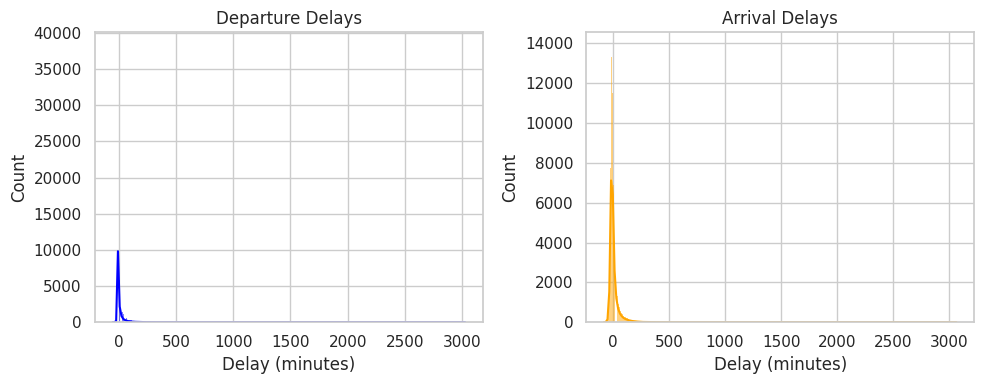

In [134]:
# Set up side-by-side plots with smaller size
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Departure Delay
sns.histplot(df_flight['dep_delay'].dropna(), kde=True, color='blue', ax=axes[0])
axes[0].set_title('Departure Delays')
axes[0].set_xlabel('Delay (minutes)')

# Plot 2: Arrival Delay
sns.histplot(df_flight['arr_delay'].dropna(), kde=True, color='orange', ax=axes[1])
axes[1].set_title('Arrival Delays')
axes[1].set_xlabel('Delay (minutes)')

plt.tight_layout()
plt.show()

**Departure Delays**

1. The distribution is **positively skewed**, with the majority of flights experiencing low departure delays (0–50 minutes).

2. The long right tail indicates the presence of outliers and extreme delay values, though these occur infrequently.

**Arrival Delays**

1. The arrival delay distribution also exhibits **positive skewness**, centered around low delay intervals, similar to departure delays.

2. Compared to departures, the distribution shows **greater dispersion**, implying **higher variability in arrival times**, potentially due to en-route or destination-related factors.

### **Frequency of Early Departures (dep_delay < 0)**

In [135]:
early_departures = df_flight[df_flight['dep_delay'] < 0]
print(f"Number of flights that departed early: {len(early_departures)}")

Number of flights that departed early: 301550


### **Departure Delays by Scheduled Departure Time Label**

/tmp/ipython-input-3147798270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deptime_label', y='dep_delay', data=df_flight, order=order, palette='coolwarm')


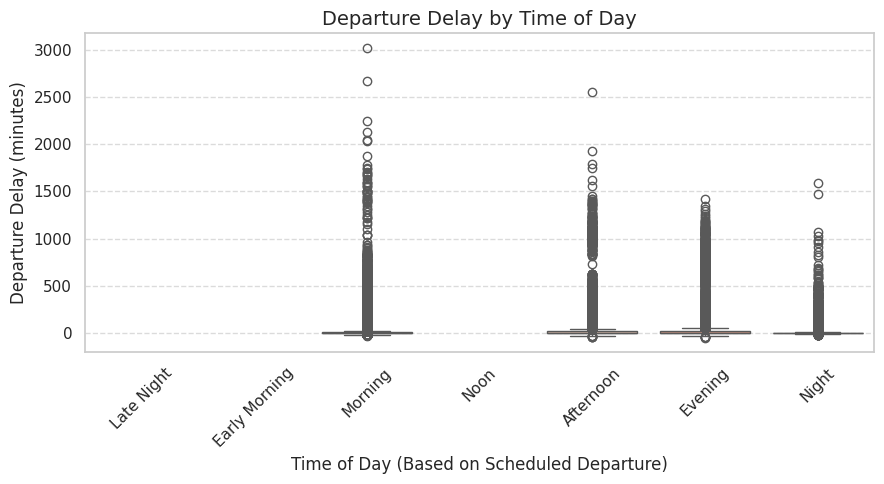

In [136]:
plt.figure(figsize=(9, 5))
order = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Afternoon', 'Evening', 'Night']
sns.boxplot(x='deptime_label', y='dep_delay', data=df_flight, order=order, palette='coolwarm')
plt.title('Departure Delay by Time of Day', fontsize=14)
plt.xlabel('Time of Day (Based on Scheduled Departure)', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Departure delays are lowest and most consistent during late night, early morning, and noon hours. Delays increase significantly in the morning and afternoon, with higher variability and extreme outliers. Evening and night flights show moderate delays. Overall, earlier flights tend to be more punctual, while midday flights face greater disruption.

### **Average Delay by Carrier**


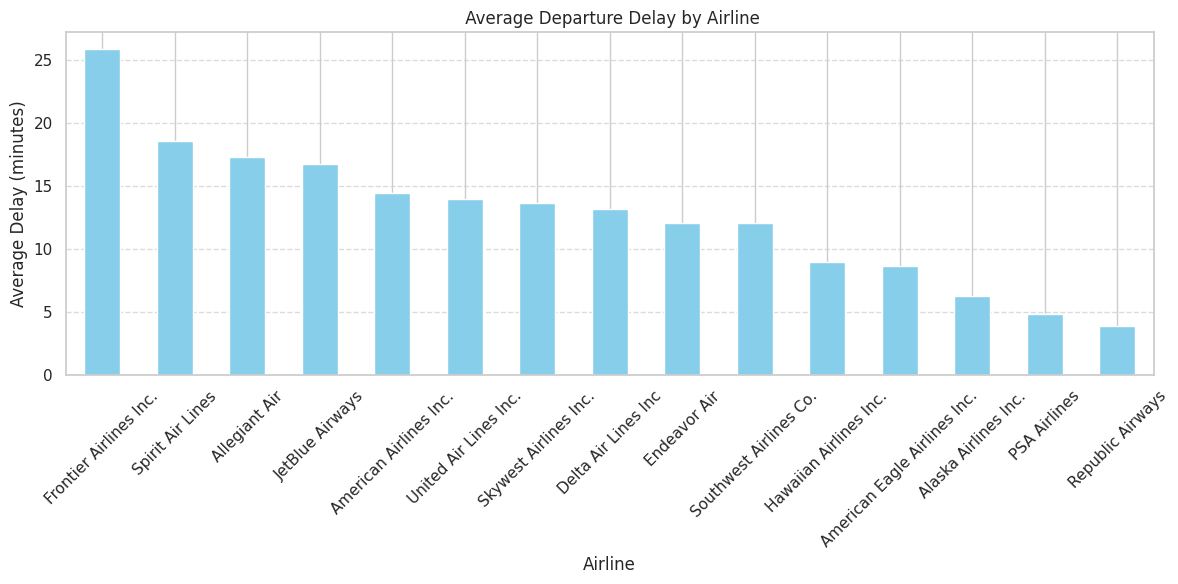

In [137]:
# Group by airline and calculate mean departure delay
carrier_delay = df_flight.groupby('airline')['dep_delay'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
carrier_delay.plot(kind='bar', color='skyblue')
plt.title(' Average Departure Delay by Airline')
plt.ylabel('Average Delay (minutes)')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. **Frontier Airlines Inc.** has the *highest average departure delay (~26 minutes)*, followed by Spirit Air Lines and Allegiant Air, indicating relatively less punctual performance.

2. Major carriers like **American, United, Delta, and JetBlue** have *moderate delays (~13–17 minutes)*, reflecting balanced operational efficiency.

3. Regional and low-traffic carriers such as **Republic Airways, PSA Airlines, and Alaska Airlines Inc.** show the *lowest average delays (under 7 minutes)*, suggesting more consistent on-time departures.


**Conclusion:** Budget and ultra-low-cost carriers tend to have longer delays, while regional airlines exhibit better punctuality, possibly due to smaller networks and less congested schedules.



Top 10 Busiest Routes:

dep_cityname    arr_cityname  
New York, NY    Chicago, IL       1329
Chicago, IL     New York, NY      1328
New York, NY    Boston, MA        1252
Boston, MA      New York, NY      1249
New York, NY    Miami, FL         1051
Miami, FL       New York, NY      1044
Honolulu, HI    Kahului, HI       1021
Kahului, HI     Honolulu, HI      1018
Boston, MA      Washington, DC    1018
Washington, DC  Boston, MA        1015
dtype: int64


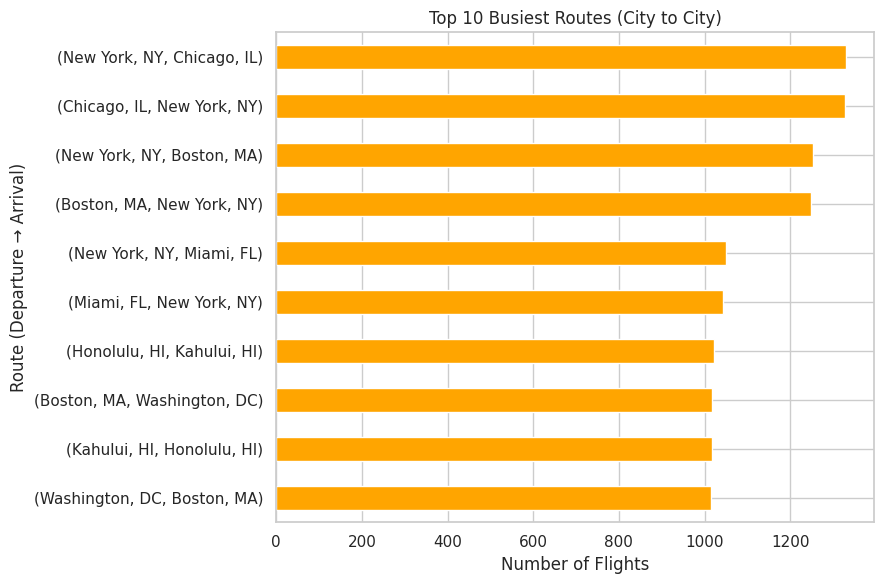

In [138]:
# Group by departure and arrival cities, count number of flights
route_counts = df_flight.groupby(['dep_cityname', 'arr_cityname']).size().sort_values(ascending=False).head(10)

# Display top 10
print("Top 10 Busiest Routes:\n")
print(route_counts)

# Optional: Visualize as horizontal bar plot
plt.figure(figsize=(9, 6))
route_counts.sort_values().plot(kind='barh', color='orange')
plt.title('Top 10 Busiest Routes (City to City)')
plt.xlabel('Number of Flights')
plt.ylabel('Route (Departure → Arrival)')
plt.tight_layout()
plt.show()


1. **New York, NY ↔ Chicago**, IL is the busiest air corridor, with over 2,650 flights in both directions, highlighting it as a major business and travel hub link.

2. **New York, NY ↔ Boston**, MA and New York, NY ↔ Miami, FL are also highly trafficked, indicating strong demand for both short-haul business routes and longer leisure travel.

3. **Honolulu, HI ↔ Kahului**, HI appears prominently, showing heavy inter-island travel within Hawaii, likely driven by tourism and local connectivity.

4. **Boston, MA ↔ Washington DC**, is another major East Coast route, supporting both government and business travel.

**Conclusion:**
The busiest routes are primarily concentrated between major metropolitan cities on the East Coast and within Hawaii, reflecting high-frequency demand from both commercial activity and tourism.


## **2. df_weather**

In [139]:
#Extract Date Features

df_weather['year'] = df_weather['time'].dt.year
df_weather['month'] = df_weather['time'].dt.month
df_weather['day'] = df_weather['time'].dt.day

In [140]:
#Updated dataset
df_weather.head(10)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id,time_check,year,month,day
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE,2023-01-01,2023,1,1
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE,2023-01-02,2023,1,2
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE,2023-01-03,2023,1,3
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE,2023-01-04,2023,1,4
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE,2023-01-05,2023,1,5
5,2023-01-06,5.8,2.8,7.2,5.8,0.0,308.0,9.0,1016.6,ABE,2023-01-06,2023,1,6
6,2023-01-07,3.8,1.7,6.7,0.0,0.0,285.0,11.2,1022.2,ABE,2023-01-07,2023,1,7
7,2023-01-08,2.2,-2.7,3.9,0.0,0.0,346.0,6.8,1024.5,ABE,2023-01-08,2023,1,8
8,2023-01-09,2.3,-1.0,5.0,0.0,0.0,271.0,11.9,1015.2,ABE,2023-01-09,2023,1,9
9,2023-01-10,1.9,-1.6,4.4,0.0,0.0,250.0,9.4,1017.4,ABE,2023-01-10,2023,1,10


### **Histograms**

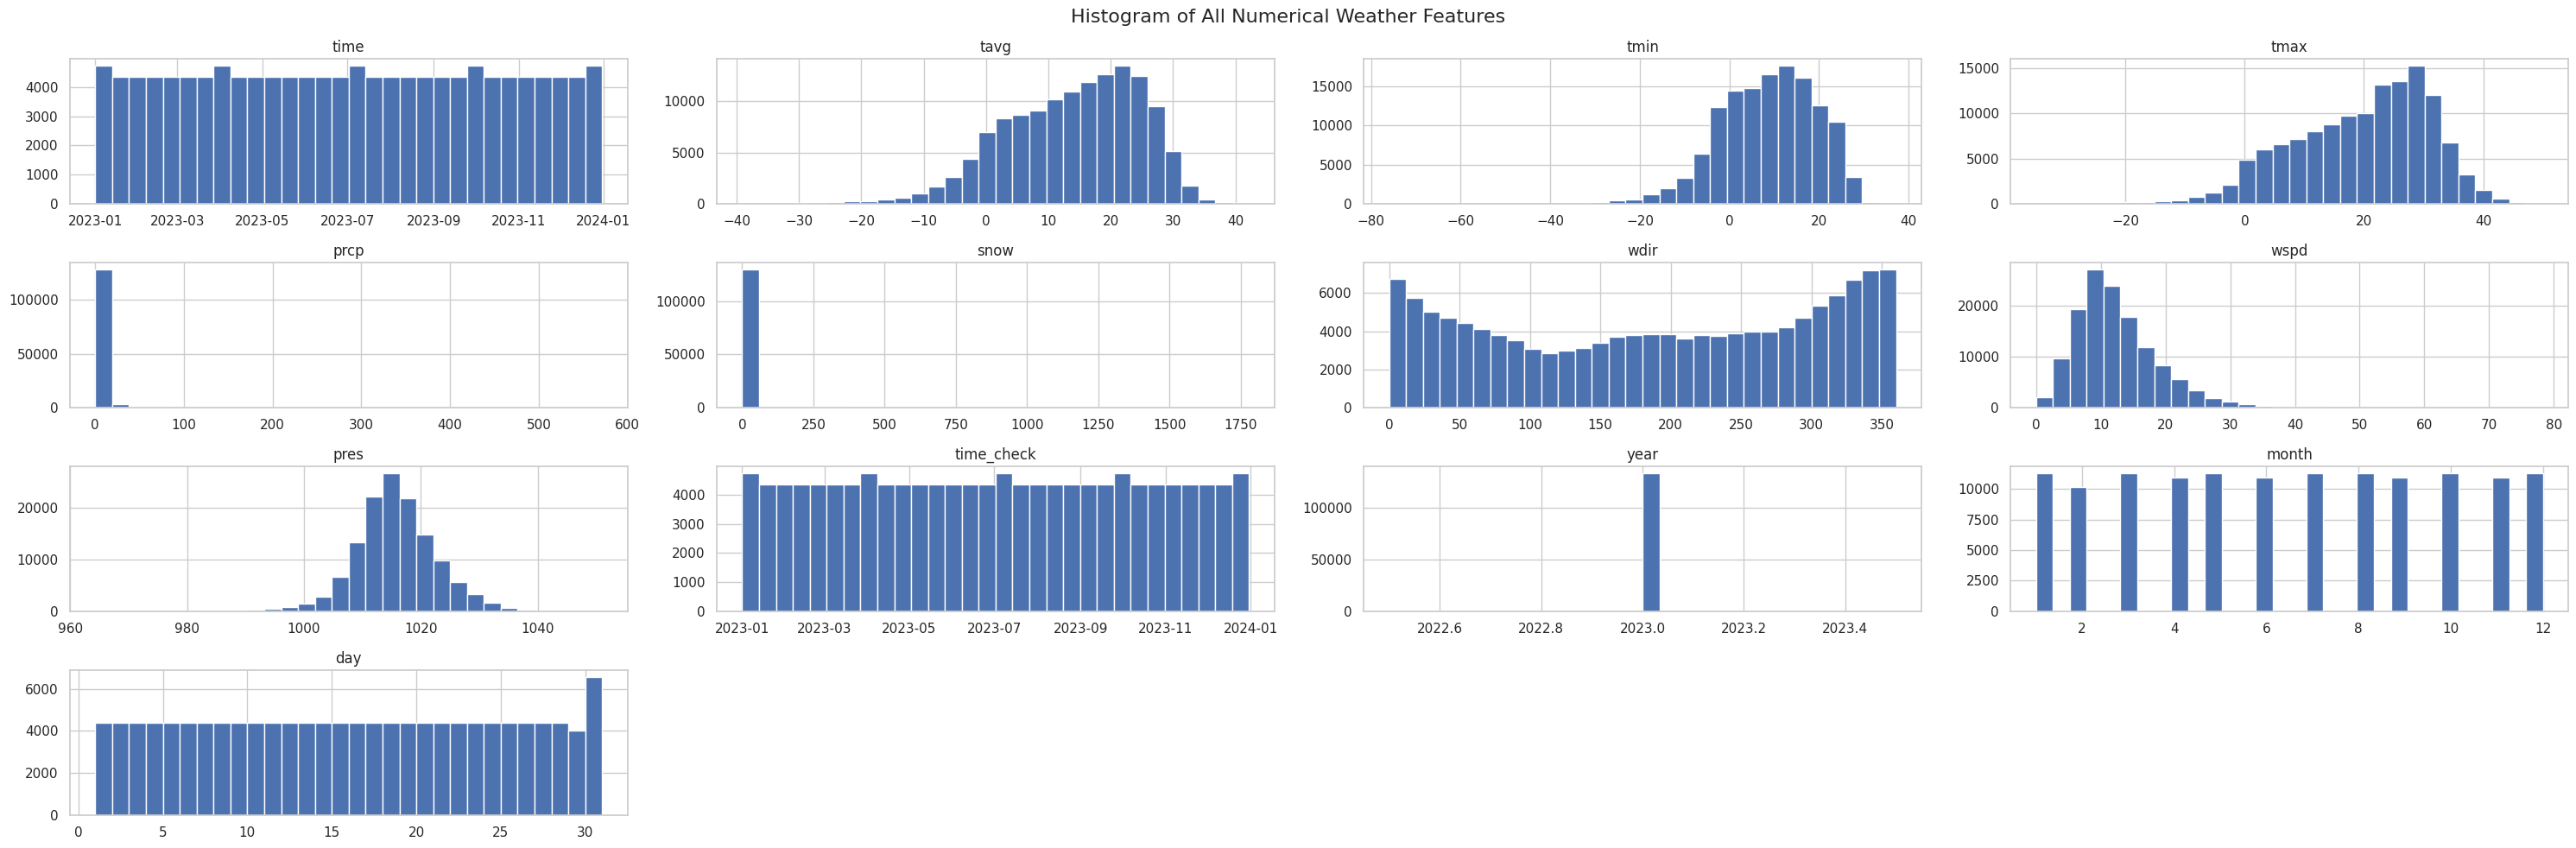

In [141]:
df_weather.hist(figsize=(30, 10), bins=30)
plt.suptitle("Histogram of All Numerical Weather Features", fontsize=16)
plt.tight_layout()
plt.show()

1.	**time:** Even distribution across the year — data spans all of 2023.

2.	**tavg (average temperature):** Mostly between 5°C to 25°C, with a slight right skew.

3.	**tmin (min temp):** Right-skewed; majority above -20°C, but some extreme cold values exist.

4.	**tmax (max temp):** Bell-shaped, centered around 20–30°C; few values go below 0°C.

5.	**prcp (precipitation):** Extremely right-skewed; most days are dry with some intense rainfall days.

6.	**snow:** Same pattern as prcp; snow is rare but spikes on a few days — possible outliers.

7.	**wdir (wind direction):** Bimodal — suggests dominant wind comes from two key directions.

8.	**wspd (wind speed):** Right-skewed; low wind speeds dominate, with few windy days.

9.	**pres (pressure):** Nicely normal; centered around 1015 hPa, no extreme values.

10.	**time_check:** Identical to time — confirms data completeness throughout the year.

11.	**year:** Single spike at 2023 — confirms dataset is only for one year.

12.	**month:** Uniform distribution — all months are well-represented, no gaps.
13.	**day:** Fairly uniform, but day 31 has slightly higher count — maybe due to inclusion from multiple months with 31 days.



### **Boxplots (for outlier detection)**

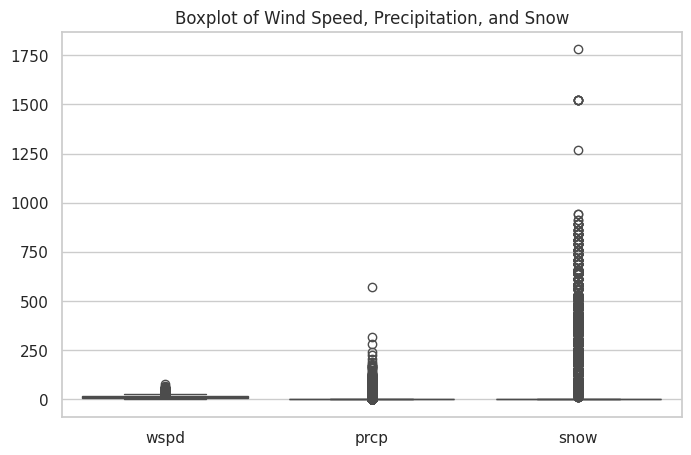

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_weather[['wspd', 'prcp', 'snow']])
plt.title("Boxplot of Wind Speed, Precipitation, and Snow")
plt.show()

**1. Wind Speed (wspd):** Mostly low and consistent, with a few moderate outliers — suggests generally calm conditions with occasional gusts.

**2. Precipitation (prcp):** Heavily right-skewed; most days are dry, but some days have intense rainfall — classic monsoon or storm spikes.

**3. Snowfall (snow):** Extreme outliers up to 1800+; most values are near zero, indicating snow is rare but can be extreme — possibly data entry errors or rare snowstorms.

### **Handling Skewness and Outliers in Precipitation and Snowfall Data**


*prcp* and *snow* have extreme outliers that may affect modeling.

But, since snowfall specifically is an important feature from flight delay prediction point of view, so I cannot remove outliers, so , for the outlier-related features like snow, prcp I have done **Robust Scaling** and for non-outlier features, I have used **Standard Scaler** in the the further steps.

### **Correlation Matrix**

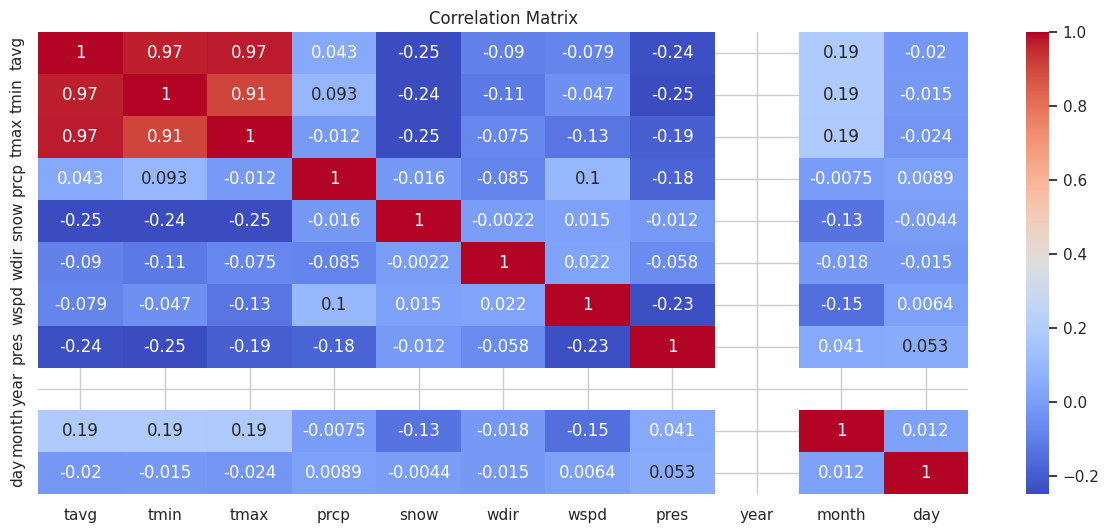

In [143]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_weather.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**tavg, tmin, tmax** are all very strongly related to each other (values around 0.97), meaning when one temperature measure goes up, the others do too.

**snow and all temperature values (tavg, tmin, tmax)** have a moderate negative relationship (about -0.28 to -0.32), meaning when there’s more snow, temperatures tend to be lower.

No strong positive or negative relationships between **temperature and wind speed** (wspd), wind direction (wdir), or pressure (pres).

### **Top 10 rainy days**

In [144]:
df_weather.sort_values('prcp', ascending=False).head(10)

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id,time_check,year,month,day
45726,2023-04-12,22.1,18.9,22.8,571.5,0.0,90.0,29.2,1014.0,FLL,2023-04-12,2023,4,12
54529,2023-05-25,26.7,23.9,26.7,316.7,0.0,177.0,60.8,997.8,GUM,2023-05-25,2023,5,25
64653,2023-02-18,21.8,19.4,22.2,282.7,0.0,338.0,5.8,1016.4,ITO,2023-02-18,2023,2,18
54528,2023-05-24,26.1,24.4,27.8,242.1,0.0,345.0,66.6,988.3,GUM,2023-05-24,2023,5,24
102199,2023-12-31,2.9,-0.6,5.6,225.0,0.0,62.0,5.1,1022.4,PUW,2023-12-31,2023,12,31
66336,2023-09-29,15.1,13.9,16.1,204.5,0.0,25.0,23.4,1020.8,JFK,2023-09-29,2023,9,29
81713,2023-11-15,25.3,20.6,27.2,191.3,0.0,76.0,28.8,1014.8,MIA,2023-11-15,2023,11,15
100236,2023-08-15,30.6,27.0,36.0,177.8,0.0,73.0,30.6,1013.9,PSE,2023-08-15,2023,8,15
93274,2023-07-19,22.4,20.6,27.8,176.5,0.0,135.0,11.2,1016.6,PAH,2023-07-19,2023,7,19
68544,2023-10-17,11.3,9.4,13.9,169.9,0.0,143.0,27.4,998.4,KTN,2023-10-17,2023,10,17


**Rainfall** is spread out across the year — not concentrated in just monsoon/summer months.

But there’s a slight clustering in late summer to early fall (Aug–Oct), which could hint at a seasonal pattern (e.g., hurricanes, tropical rains in the US).

## **3. df_airport**

### **Top States by Number of Airports**

/tmp/ipython-input-913387526.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')


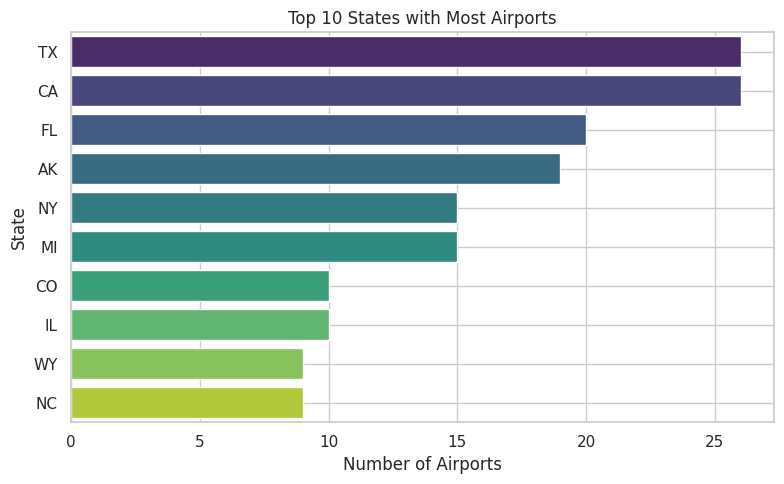

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

top_states = df_airport['state'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title("Top 10 States with Most Airports")
plt.xlabel("Number of Airports")
plt.ylabel("State")
plt.grid(True)
plt.tight_layout()
plt.show()

**Texas (TX)** leads the nation with the highest number of airports, narrowly surpassing California (CA). Following closely behind is Florida (FL), while Alaska (AK) and New York (NY) also rank among the top states. Rounding out the top ten are Michigan (MI), Colorado (CO), Illinois (IL), Wyoming (WY), and North Carolina (NC), each contributing a noteworthy but comparatively smaller share of the country's airport count.

### **Plot Airport Locations on a Map**

In [146]:
import folium
from folium.plugins import MarkerCluster, MiniMap
import random

# Mean center of all airports
mean_lat = df_airport['latitude'].mean()
mean_lon = df_airport['longitude'].mean()

# Create base map
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=5, control_scale=True)

# Add a MiniMap for cuteness and usability
MiniMap(toggle_display=True).add_to(m)

# Create marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Make a list of random colors (or map countries to specific colors)
country_colors = {}
color_palette = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'cadetblue', 'darkgreen', 'black']

# Loop through the DataFrame
for _, row in df_airport.iterrows():
    country = row['country']

    # Assign a color to each country if not already done
    if country not in country_colors:
        country_colors[country] = random.choice(color_palette)

    # Popup text with nice formatting
    popup_text = f"""
    <b>Airport:</b> {row['airport']}<br>
    <b>City:</b> {row['city']}<br>
    <b>State:</b> {row['state']}<br>
    <b>Country:</b> {row['country']}
    """

    # Add to cluster
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=folium.Popup(popup_text, max_width=300),
        color=country_colors[country],
        fill=True,
        fill_color=country_colors[country],
        fill_opacity=0.8
    ).add_to(marker_cluster)

m.save("pretty_airport_map.html")
m

## **4. df_cancelled**

### **Cancellation Rate by Airline**

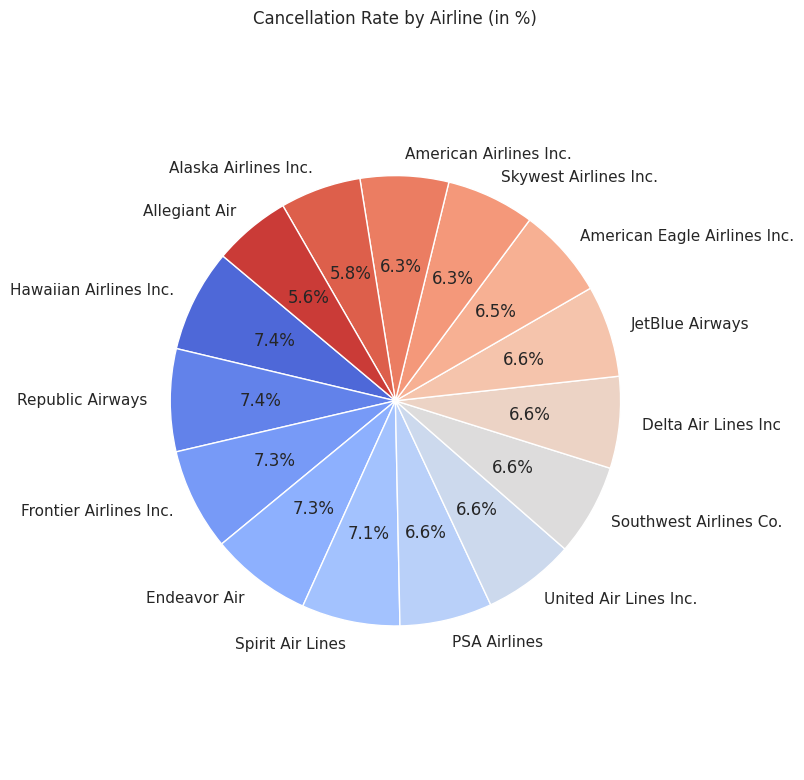

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average cancellation rate per airline
airline_cancel = df_cancelled.groupby('airline')['cancelled'].mean().sort_values(ascending=False)

# Convert to percentage
airline_cancel_percent = airline_cancel * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    airline_cancel_percent,
    labels=airline_cancel_percent.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("coolwarm", len(airline_cancel_percent))
)
plt.title('Cancellation Rate by Airline (in %)')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.tight_layout()
plt.show()


1.  **Hawaiian Airlines and Republic Airways** have the highest cancellation rates, both around **7.4%.**

2. **Frontier Airlines and Endeavor Air** also show high cancellation rates, each **above 7%.**

3. **Allegiant Air and Alaska Airlines** have the lowest cancellation rates, approximately **5.6% and 5.8% respectively.**

4. **Most other major carriers**—American, Delta, United, Southwest, and JetBlue—hover **around a 6.6%** cancellation rate.

### **Cancellations Over Time**

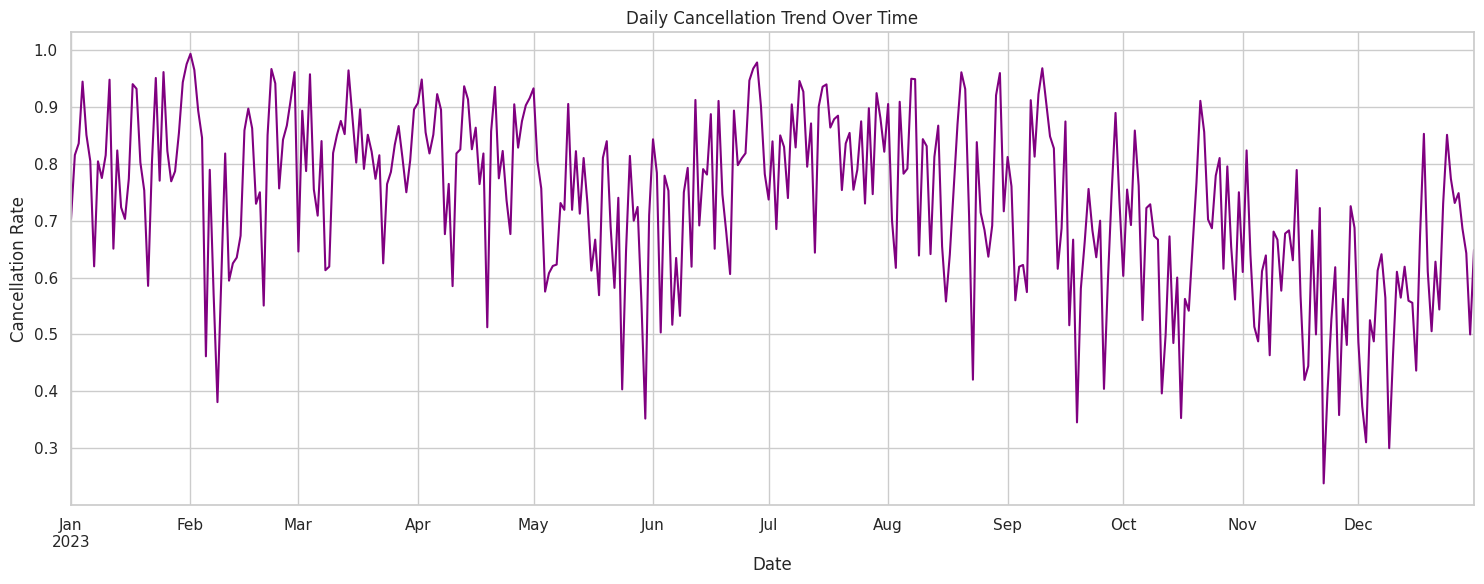

In [148]:
cancel_trend = df_cancelled.groupby('flightdate')['cancelled'].mean()

plt.figure(figsize=(15, 6))
cancel_trend.plot(color='purple')
plt.title('Daily Cancellation Trend Over Time')
plt.ylabel('Cancellation Rate')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

Most days in 2023 saw high flight cancellation rates, often between **70% and 100%.**

There’s **no clear upward or downward trend**, but sharp drops in Feb, Jun, Sep, and Dec show brief periods of fewer cancellations.

Overall, cancellations were common and unpredictable throughout the year.

### **Day of Week Analysis**

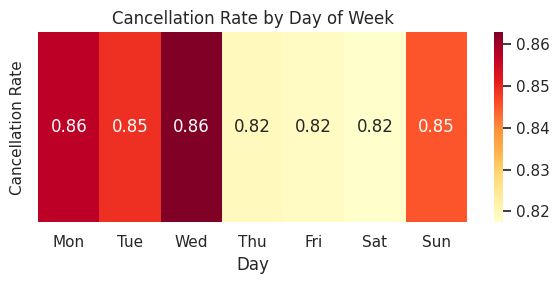

In [149]:
import seaborn as sns
import pandas as pd

# Map day numbers to day names
day_map = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
df['day_name'] = df['day_of_week'].map(day_map)

# Group by day and calculate mean cancellation rate
dow_cancel = df.groupby('day_name')['cancelled'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Prepare DataFrame for heatmap
heat_df = pd.DataFrame({'Day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
                        'Cancellation Rate': dow_cancel.values})

plt.figure(figsize=(6, 3))
sns.heatmap(heat_df.set_index('Day').T, cmap='YlOrRd', annot=True, fmt=".2f")
plt.title("Cancellation Rate by Day of Week")
plt.tight_layout()
plt.show()

Flights are slightly more likely to be canceled at the beginning and end of the week, and cancellations are a bit less common from Thursday to Saturday.

### **Time of Day vs Cancellations**

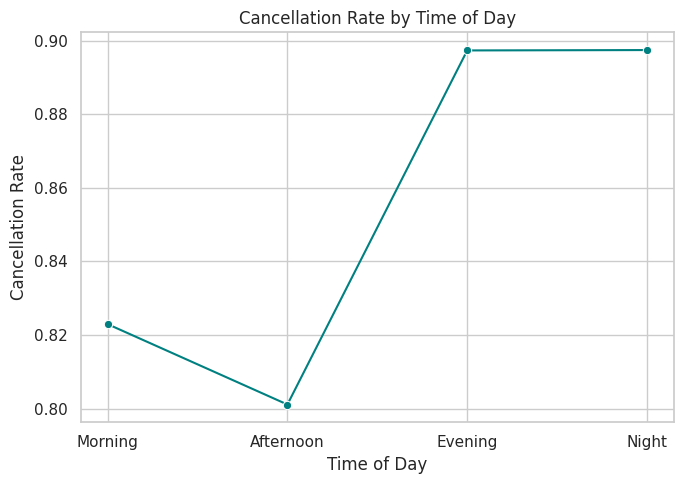

In [150]:
# Group by deptime_label and calculate mean cancellation rate
time_cancel = df.groupby('deptime_label')['cancelled'].mean()

# Optional: reorder if needed
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
time_cancel = time_cancel.reindex(time_order)

plt.figure(figsize=(7, 5))
sns.lineplot(x=time_cancel.index, y=time_cancel.values, marker='o', color='teal')
plt.title('Cancellation Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Flights are more likely to be canceled in the evening or night, and are least likely to be canceled in the afternoon.

# **Time Series Component**

### **Analyzing flightdate**

In [151]:
start_date = df['flightdate'].min()
end_date = df['flightdate'].max()

print(f"Dataset covers from {start_date.date()} to {end_date.date()}")


Dataset covers from 2023-01-01 to 2023-12-31


<Axes: title={'center': 'Flights Per Day'}, xlabel='flightdate'>

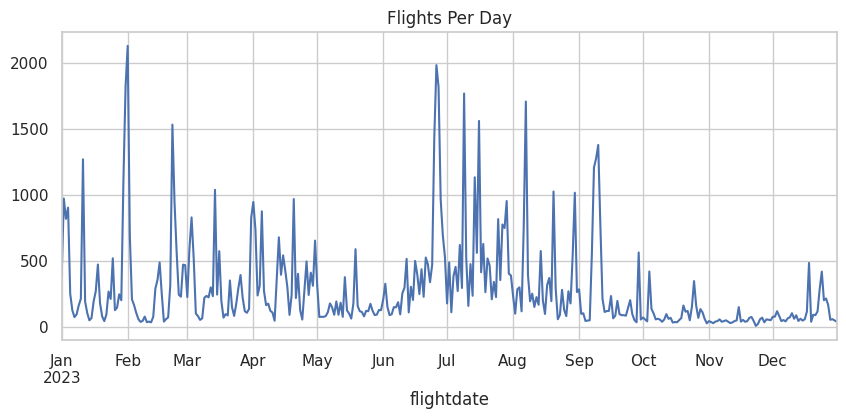

In [152]:
df['flightdate'].value_counts().sort_index().plot(kind='line', figsize=(10,4), title="Flights Per Day")

The plot shows daily flight counts in 2023 with extreme spikes in February, July, and August, indicating peak travel or special events. Many days have low activity, especially from October onward, suggesting seasonal decline or reduced operations. The variability is high, reflecting irregular flight demand across the year.

In [153]:
print(f"Total unique days in dataset: {df['flightdate'].nunique()}")

Total unique days in dataset: 365


In [154]:
# Extract month and day from the flightdate
df['month'] = df['flightdate'].dt.month  # Useful for seasonal patterns in delays
df['day'] = df['flightdate'].dt.day      # Helpful for spotting trends over the month


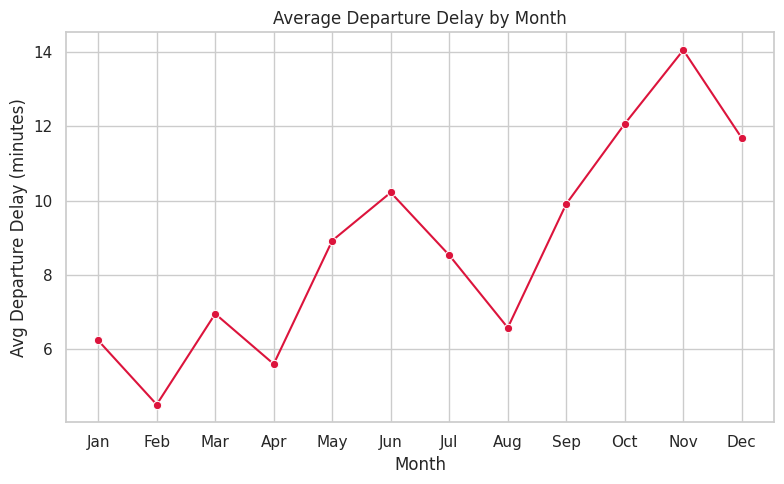

In [155]:
# Step 1: Group by month and calculate average departure delay
monthly_trend = df.groupby('month')['dep_delay'].mean()

# Month names for x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Step 2: Plot the trend
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='crimson')
plt.title("Average Departure Delay by Month")
plt.xlabel("Month")
plt.ylabel("Avg Departure Delay (minutes)")
plt.xticks(ticks=range(1, 13), labels=month_labels)
plt.grid(True)
plt.tight_layout()
plt.show()

This graph displays the average departure delay per month, revealing notable **peaks in June and November**, suggesting seasonal or operational challenges. **February and April show the lowest delays**, indicating smoother flight operations. The fluctuation across months highlights how external factors like weather, holidays, or passenger load can affect punctuality.

/tmp/ipython-input-1670586392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_flight_counts.index, y=monthly_flight_counts.values, palette='Blues_d')


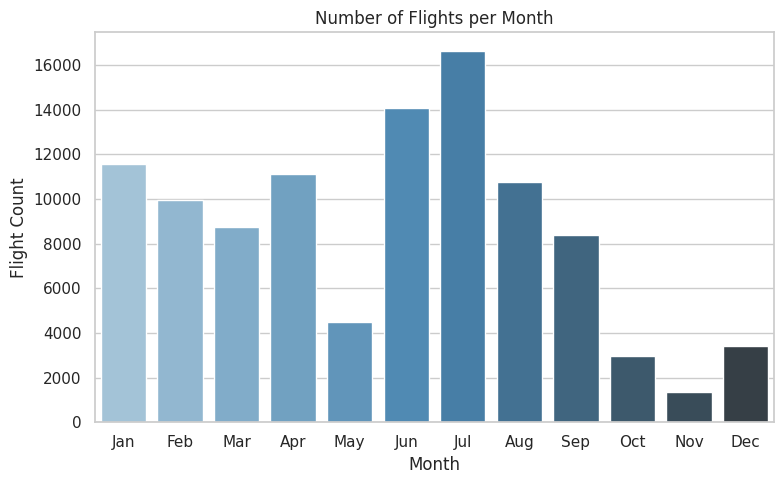

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count number of flights in each month
monthly_flight_counts = df['month'].value_counts().sort_index()

# Step 2: Plot the barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_flight_counts.index, y=monthly_flight_counts.values, palette='Blues_d')
plt.title("Number of Flights per Month")
plt.xlabel("Month")
plt.ylabel("Flight Count")
plt.xticks(range(0, 12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()


The second chart shows clear seasonal patterns in flight volume. **June and July experience the highest number of flights**, driven by summer vacations and peak travel demand. Volumes remain steady from April to October, reflecting consistent operations. However, a **sharp decline in December** suggests winter-related disruptions like weather issues, reduced schedules, and holiday congestion. January and February also have relatively lower volumes, continuing the winter slump. Overall, the chart reflects how weather, holidays, and seasonal travel trends shape monthly flight operations.

**Correlation between the two graphs**

The two graphs show a ***partial inverse correlation***: months with higher flight volumes, like June and July, don’t experience the worst delays, suggesting **efficient handling during peak season**. However, December stands out, with **low flight volume but high delays** highlighting how winter weather and holiday strain can disrupt schedules despite fewer flights.

# **Dropping df_cancelled**

Dropping df_cancelled because it is irrelevant from delay prediction point of view. Instead, I calculate the cancellation rate per airline, giving a clear, unified measure of airline performance without redundant data. This keeps analysis clean, accurate, and easy to interpret.

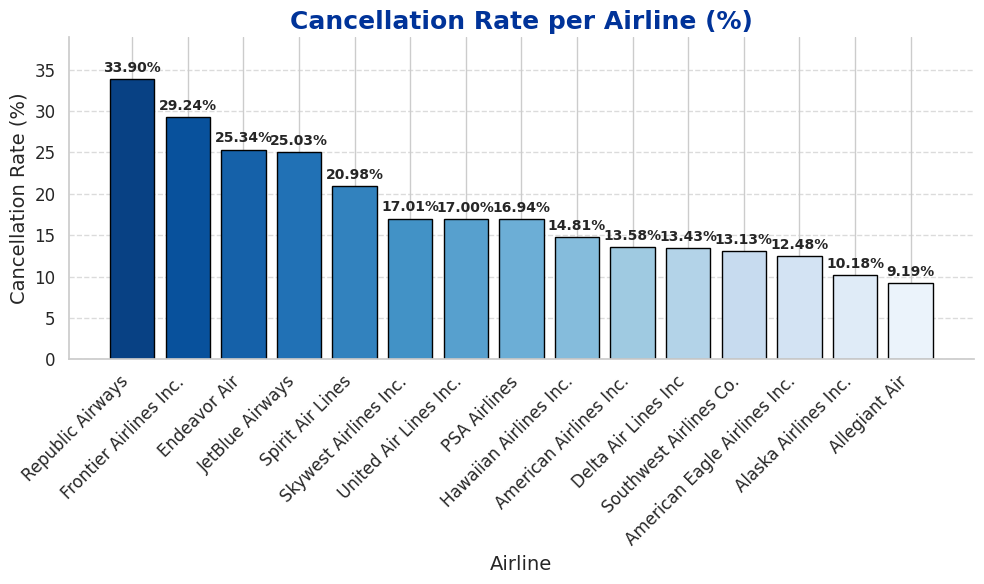

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set_style("whitegrid")

# Calculate cancellation count per airline
cancel_counts = df_cancelled.groupby('airline')['cancelled'].sum()

# Calculate total flights per airline (from both datasets)
total_flights = df_flight['airline'].value_counts()

# Align indexes and calculate rate
cancellation_rate = (cancel_counts / total_flights) * 100
cancellation_rate = cancellation_rate.dropna().sort_values(ascending=False)

# Create a color palette based on the cancellation rate values
palette = sns.color_palette("Blues_r", len(cancellation_rate))

plt.figure(figsize=(10,6))  # smaller figure size
bars = plt.bar(cancellation_rate.index, cancellation_rate, color=palette, edgecolor='black')

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Cancellation Rate per Airline (%)', fontsize=18, fontweight='bold', color='#003399')
plt.ylabel('Cancellation Rate (%)', fontsize=14)
plt.xlabel('Airline', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, cancellation_rate.max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

Republic Airways leads with the highest cancellation rate (34%), followed by Frontier and Endeavor Airlines. Allegiant Air has the lowest (9%). Overall, smaller regional airlines show more cancellations, while major carriers like American and Delta maintain relatively lower rates.

**So now we have got these three DataFrames left:**

1. df_flight

2. df_weather

3. df_airport

### **Reson for dropping df_airport from model building analysis (To be kept as a lookup table for inverse transformation later)**

**df_airport** contains airport metadata such as IATA codes, names, cities, countries, and geographic coordinates. It will primarily support geo-spatial analysis of delays and exploration of regional delay patterns. For predictive modeling, *only df_flight and df_weather will be retained as core analytical datasets*.


# **JOINING TABLES**

Started with two main datasets **df_flight**, containing operational and schedule details for each flight, and **df_weather**, containing daily weather measurements per airport. My goal was to predict the likelihood of delay, so having accurate weather context for each departure was essential.

To achieve this, I merged the datasets by matching *dep_airport* from both the dataframes, and aligning flightdate with time to ensure the weather corresponds to the correct day.

This allowed me to attach temperature, precipitation, wind, and other weather variables to each flight record.

In [203]:
df_flight.head()

,flightdate,day_of_week,airline,tail_number,dep_airport,dep_cityname,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,...,flight_duration,distance_type,delay_carrier,delay_weather,delay_nas,delay_security,delay_lastaircraft,manufacturer,model,aircraft_age
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,56,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,62,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,16
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,49,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,54,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,17
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,50,Short Haul >1500Mi,0,0,0,0,0,CANADAIR REGIONAL JET,CRJ,10


In [159]:
df_weather.head()

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,airport_id,time_check,year,month,day
0,2023-01-01,8.1,2.2,11.7,0.0,0.0,278.0,9.7,1013.8,ABE,2023-01-01,2023,1,1
1,2023-01-02,5.4,0.0,11.7,0.0,0.0,353.0,3.6,1019.6,ABE,2023-01-02,2023,1,2
2,2023-01-03,8.4,7.2,9.4,15.2,0.0,50.0,5.0,1013.9,ABE,2023-01-03,2023,1,3
3,2023-01-04,11.1,6.7,17.2,0.0,0.0,302.0,4.7,1009.8,ABE,2023-01-04,2023,1,4
4,2023-01-05,12.7,6.7,14.4,7.9,0.0,292.0,7.2,1013.0,ABE,2023-01-05,2023,1,5


**Joing df_flight and df_weather**

In [160]:
# Ensure datetime types match
df_flight['flightdate'] = pd.to_datetime(df_flight['flightdate'])
df_weather['time_check'] = pd.to_datetime(df_weather['time_check'])

# Merge on date and airport code
df_merged = pd.merge(
    df_flight,
    df_weather,
    how='left',  # keep all flights
    left_on=['flightdate', 'dep_airport'],
    right_on=['time_check', 'airport_id']
)

print(f"Merged dataset shape: {df_merged.shape}")
df_merged.head()

Merged dataset shape: (527194, 38)


,flightdate,day_of_week,airline,tail_number,dep_airport,dep_cityname,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,...,prcp,snow,wdir,wspd,pres,airport_id,time_check,year,month,day
0,2023-01-02,1,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-3,0,Low <5min,...,0.0,0.0,338.0,3.2,1019.1,BDL,2023-01-02,2023,1,2
1,2023-01-03,2,Endeavor Air,N605LR,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,10.7,0.0,3.0,3.6,1015.2,BDL,2023-01-03,2023,1,3
2,2023-01-04,3,Endeavor Air,N331PQ,BDL,"Hartford, CT",Morning,-5,0,Low <5min,...,6.6,0.0,1.0,7.2,1011.1,BDL,2023-01-04,2023,1,4
3,2023-01-05,4,Endeavor Air,N906XJ,BDL,"Hartford, CT",Morning,-6,0,Low <5min,...,0.8,0.0,14.0,13.7,1014.8,BDL,2023-01-05,2023,1,5
4,2023-01-06,5,Endeavor Air,N337PQ,BDL,"Hartford, CT",Morning,-1,0,Low <5min,...,9.7,0.0,0.0,5.8,1016.1,BDL,2023-01-06,2023,1,6


### **Dropping unecessary features**

After merging,I dropped redundant or non-predictive columns (time_check, airport_id, arr_cityname, dep_cityname, manufacturer, etc.) to avoid unnecessary noise in the models.

These columns were removed because they provide minimal predictive value for delays or risk causing overfitting. Tail numbers and aircraft models are too specific to individual planes, while city names, manufacturer, and airport IDs are redundant. Time-related columns (time, time_check) duplicate flightdate and add no extra useful variation.

The resulting dataset is now enriched with both operational and environmental factors, ready for encoding and model building.

In [161]:
df_merged.drop(['time','time_check', 'airport_id', 'arr_cityname','dep_cityname', 'manufacturer'], axis=1, inplace=True)

In [162]:
df_merged.drop(['tail_number','model'], axis=1, inplace=True)

In [163]:
df_merged.head()

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,arr_airport,arr_delay,...,tmin,tmax,prcp,snow,wdir,wspd,pres,year,month,day
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,Low <5min,LGA,-12,...,-2.1,8.3,0.0,0.0,338.0,3.2,1019.1,2023,1,2
1,2023-01-03,2,Endeavor Air,BDL,Morning,-5,0,Low <5min,LGA,-8,...,-1.6,4.4,10.7,0.0,3.0,3.6,1015.2,2023,1,3
2,2023-01-04,3,Endeavor Air,BDL,Morning,-5,0,Low <5min,LGA,-21,...,3.9,8.3,6.6,0.0,1.0,7.2,1011.1,2023,1,4
3,2023-01-05,4,Endeavor Air,BDL,Morning,-6,0,Low <5min,LGA,-17,...,3.9,7.8,0.8,0.0,14.0,13.7,1014.8,2023,1,5
4,2023-01-06,5,Endeavor Air,BDL,Morning,-1,0,Low <5min,LGA,-16,...,0.0,3.9,9.7,0.0,0.0,5.8,1016.1,2023,1,6


In [164]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527194 entries, 0 to 527193
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   flightdate          527194 non-null  datetime64[ns]
 1   day_of_week         527194 non-null  int64         
 2   airline             527194 non-null  object        
 3   dep_airport         527194 non-null  object        
 4   deptime_label       527194 non-null  object        
 5   dep_delay           527194 non-null  int64         
 6   dep_delay_tag       527194 non-null  int64         
 7   dep_delay_type      527194 non-null  object        
 8   arr_airport         527194 non-null  object        
 9   arr_delay           527194 non-null  int64         
 10  arr_delay_type      527194 non-null  object        
 11  flight_duration     527194 non-null  int64         
 12  distance_type       527194 non-null  object        
 13  delay_carrier       527194 no

## **Encoding**

Before proceeding with encoding, I am creating a **df_merged_original** as a copy for inverse tranformation later on.

In [165]:
df_merged_original=df_merged.copy()
df_merged_original.head()

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,arr_airport,arr_delay,...,tmin,tmax,prcp,snow,wdir,wspd,pres,year,month,day
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,Low <5min,LGA,-12,...,-2.1,8.3,0.0,0.0,338.0,3.2,1019.1,2023,1,2
1,2023-01-03,2,Endeavor Air,BDL,Morning,-5,0,Low <5min,LGA,-8,...,-1.6,4.4,10.7,0.0,3.0,3.6,1015.2,2023,1,3
2,2023-01-04,3,Endeavor Air,BDL,Morning,-5,0,Low <5min,LGA,-21,...,3.9,8.3,6.6,0.0,1.0,7.2,1011.1,2023,1,4
3,2023-01-05,4,Endeavor Air,BDL,Morning,-6,0,Low <5min,LGA,-17,...,3.9,7.8,0.8,0.0,14.0,13.7,1014.8,2023,1,5
4,2023-01-06,5,Endeavor Air,BDL,Morning,-1,0,Low <5min,LGA,-16,...,0.0,3.9,9.7,0.0,0.0,5.8,1016.1,2023,1,6


In [166]:
df_merged_original.columns

Index(['flightdate', 'day_of_week', 'airline', 'dep_airport', 'deptime_label',
       'dep_delay', 'dep_delay_tag', 'dep_delay_type', 'arr_airport',
       'arr_delay', 'arr_delay_type', 'flight_duration', 'distance_type',
       'delay_carrier', 'delay_weather', 'delay_nas', 'delay_security',
       'delay_lastaircraft', 'aircraft_age', 'tavg', 'tmin', 'tmax', 'prcp',
       'snow', 'wdir', 'wspd', 'pres', 'year', 'month', 'day'],
      dtype='object')

### Encoding Summary

**`dep_delay_type_encoded`**
- `0` → Low <5min  
- `1` → Medium >15min  
- `2` → High >60min  

**`arr_delay_type_encoded`**
- `0` → Low <5min  
- `1` → Medium >15min  
- `2` → High >60min  

**`distance_type_encoded`**
- `0` → Short Haul >1500Mi  
- `1` → Medium Haul <3000Mi  
- `2` → Long Haul <6000Mi  

**1. dep_delay_type**

In [167]:
df_merged['dep_delay_type'].unique()

array(['Low <5min', 'Medium >15min', 'Hight >60min'], dtype=object)

In [168]:
# Fixing typo in 'dep_delay_type' column: replacing 'Hight >60min' with 'High >60min'
df_merged['dep_delay_type'] = df_merged['dep_delay_type'].replace('Hight >60min', 'High >60min')

In [169]:
df_merged['dep_delay_type'].unique()

array(['Low <5min', 'Medium >15min', 'High >60min'], dtype=object)

Used **ordinal encoding** because dep_delay_type represents ranked delay severity. Assigning numeric values preserves this natural order (low < medium < high), enabling models to capture delay progression.

One-hot encoding would treat them as unrelated categories, losing ranking information and increasing feature space unnecessarily, especially for small, ordered categorical variables.

In [170]:
# Ordinal encoding: Low < Medium < High
delay_mapping = {'Low <5min': 0, 'Medium >15min': 1, 'High >60min': 2}
df_merged['dep_delay_type_encoded'] = df_merged['dep_delay_type'].map(delay_mapping)

In [171]:
df_merged.head()

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,dep_delay_type,arr_airport,arr_delay,...,tmax,prcp,snow,wdir,wspd,pres,year,month,day,dep_delay_type_encoded
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,Low <5min,LGA,-12,...,8.3,0.0,0.0,338.0,3.2,1019.1,2023,1,2,0
1,2023-01-03,2,Endeavor Air,BDL,Morning,-5,0,Low <5min,LGA,-8,...,4.4,10.7,0.0,3.0,3.6,1015.2,2023,1,3,0
2,2023-01-04,3,Endeavor Air,BDL,Morning,-5,0,Low <5min,LGA,-21,...,8.3,6.6,0.0,1.0,7.2,1011.1,2023,1,4,0
3,2023-01-05,4,Endeavor Air,BDL,Morning,-6,0,Low <5min,LGA,-17,...,7.8,0.8,0.0,14.0,13.7,1014.8,2023,1,5,0
4,2023-01-06,5,Endeavor Air,BDL,Morning,-1,0,Low <5min,LGA,-16,...,3.9,9.7,0.0,0.0,5.8,1016.1,2023,1,6,0


In [172]:
#Dropping dep_delay_type becaue I have encoded it
df_merged = df_merged.drop(columns=['dep_delay_type'])

In [173]:
df_merged.head(1)

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,arr_airport,arr_delay,arr_delay_type,...,tmax,prcp,snow,wdir,wspd,pres,year,month,day,dep_delay_type_encoded
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,LGA,-12,Low <5min,...,8.3,0.0,0.0,338.0,3.2,1019.1,2023,1,2,0


**2. arr_delay_type**

Following the same steps for arr_dep_delay

In [174]:
df_merged['arr_delay_type'].unique()

array(['Low <5min', 'Hight >60min', 'Medium >15min'], dtype=object)

In [175]:
from sklearn.preprocessing import OrdinalEncoder

# Fix typos if any (example: 'Hight' -> 'High')
df_merged['arr_delay_type'] = df_merged['arr_delay_type'].replace({
    'Hight >60min': 'High >60min'
})

# Define custom order for encoding
delay_order = [['Low <5min', 'Medium >15min', 'High >60min']]

# Initialize encoder
ordinal_encoder_arr = OrdinalEncoder(categories=delay_order)

# Fit and transform
df_merged['arr_delay_type_encoded'] = ordinal_encoder_arr.fit_transform(
    df_merged[['arr_delay_type']]
).astype(int)

#Dropping the column after encoding
df_merged.drop(columns=['arr_delay_type'], inplace=True)

In [176]:
df_merged.head(1)

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,arr_airport,arr_delay,flight_duration,...,prcp,snow,wdir,wspd,pres,year,month,day,dep_delay_type_encoded,arr_delay_type_encoded
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,LGA,-12,56,...,0.0,0.0,338.0,3.2,1019.1,2023,1,2,0,0


**3. distance_type**

In [177]:
df_merged['distance_type'].unique()

array(['Short Haul >1500Mi', 'Medium Haul <3000Mi', 'Long Haul <6000Mi'],
      dtype=object)

In [178]:
from sklearn.preprocessing import OrdinalEncoder

# Define custom order for encoding (example order)
distance_order = [['Short Haul >1500Mi', 'Medium Haul <3000Mi', 'Long Haul <6000Mi']]

# Initialize encoder
ordinal_encoder_dist = OrdinalEncoder(categories=distance_order)

# Fit and transform, then convert to int
df_merged['distance_type_encoded'] = ordinal_encoder_dist.fit_transform(
    df_merged[['distance_type']]
).astype(int)

df_merged.drop(columns=['distance_type'], inplace=True)

Converted flight distance into **binary:** flights with encoded value ≤0 (short haul) marked as **short (0)**, and >0 (medium and long haul) marked as **long (1)**, simplifying distance classification for modeling.

In [179]:
df_merged['flight_distance_binary'] = (df_merged['distance_type_encoded'] > 0).astype(int)

In [180]:
#Dropped the column
df_merged.drop(columns=['distance_type_encoded'], inplace=True)

In [181]:
df_merged['flight_distance_binary'].unique()

array([0, 1])

In [182]:
df_merged.head(5)

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,arr_airport,arr_delay,flight_duration,...,snow,wdir,wspd,pres,year,month,day,dep_delay_type_encoded,arr_delay_type_encoded,flight_distance_binary
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,LGA,-12,56,...,0.0,338.0,3.2,1019.1,2023,1,2,0,0,0
1,2023-01-03,2,Endeavor Air,BDL,Morning,-5,0,LGA,-8,62,...,0.0,3.0,3.6,1015.2,2023,1,3,0,0,0
2,2023-01-04,3,Endeavor Air,BDL,Morning,-5,0,LGA,-21,49,...,0.0,1.0,7.2,1011.1,2023,1,4,0,0,0
3,2023-01-05,4,Endeavor Air,BDL,Morning,-6,0,LGA,-17,54,...,0.0,14.0,13.7,1014.8,2023,1,5,0,0,0
4,2023-01-06,5,Endeavor Air,BDL,Morning,-1,0,LGA,-16,50,...,0.0,0.0,5.8,1016.1,2023,1,6,0,0,0


## **Defining the target variable**

**overall_delay_binary** becomes my target variable for binary classification.

Took two columns: dep_delay_encoded and arr_delay_encoded.

Used **OR logic** to combine them.

Created overall_delay_binary :
*   1 = delayed
*   0 = on-time/early




In [183]:
#Create binary target from delay column
df_merged['overall_delay_binary'] = (
    (df_merged['dep_delay_type_encoded'] > 0) | (df_merged['arr_delay_type_encoded'] > 0)
).astype(int)


In [184]:
df_merged['overall_delay_binary'].unique()

array([0, 1])

Dropped **dep_delay_type_encoded** and **arr_delay_type_encoded** to **prevent data leakage**, avoiding duplicate delay info and keeping only one clean target variable.

In [185]:
df_merged.drop(columns=['dep_delay_type_encoded', 'arr_delay_type_encoded'], inplace=True)

In [186]:
df_merged

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,arr_airport,arr_delay,flight_duration,...,prcp,snow,wdir,wspd,pres,year,month,day,flight_distance_binary,overall_delay_binary
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,LGA,-12,56,...,0.0,0.0,338.0,3.2,1019.1,2023,1,2,0,0
1,2023-01-03,2,Endeavor Air,BDL,Morning,-5,0,LGA,-8,62,...,10.7,0.0,3.0,3.6,1015.2,2023,1,3,0,0
2,2023-01-04,3,Endeavor Air,BDL,Morning,-5,0,LGA,-21,49,...,6.6,0.0,1.0,7.2,1011.1,2023,1,4,0,0
3,2023-01-05,4,Endeavor Air,BDL,Morning,-6,0,LGA,-17,54,...,0.8,0.0,14.0,13.7,1014.8,2023,1,5,0,0
4,2023-01-06,5,Endeavor Air,BDL,Morning,-1,0,LGA,-16,50,...,9.7,0.0,0.0,5.8,1016.1,2023,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527189,2023-01-02,1,United Air Lines Inc.,FLL,Morning,-5,0,ORD,-14,192,...,0.0,0.0,68.0,14.4,1021.1,2023,1,2,0,0
527190,2023-01-02,1,United Air Lines Inc.,EWR,Morning,11,1,MKE,6,151,...,0.3,0.0,320.0,3.0,1019.8,2023,1,2,0,0
527191,2023-01-02,1,United Air Lines Inc.,DEN,Morning,7,1,LAX,16,167,...,3.0,100.0,0.0,13.0,1008.6,2023,1,2,0,1
527192,2023-01-02,1,United Air Lines Inc.,ORD,Afternoon,64,1,RSW,54,172,...,0.0,0.0,31.0,10.4,1016.8,2023,1,2,0,1


### Encoding **dep_airport** and **arr_airport**

In [187]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Combine unique airports from both columns
all_airports = pd.concat([df_merged['dep_airport'], df_merged['arr_airport']]).unique()

# Step 2: Fit LabelEncoder on combined airports
airport_encoder = LabelEncoder()
airport_encoder.fit(all_airports)

# Step 3: Transform dep_airport and arr_airport separately
df_merged['dep_airport_encoded'] = airport_encoder.transform(df_merged['dep_airport'])
df_merged['arr_airport_encoded'] = airport_encoder.transform(df_merged['arr_airport'])



In [188]:
df_merged

,flightdate,day_of_week,airline,dep_airport,deptime_label,dep_delay,dep_delay_tag,arr_airport,arr_delay,flight_duration,...,wdir,wspd,pres,year,month,day,flight_distance_binary,overall_delay_binary,dep_airport_encoded,arr_airport_encoded
0,2023-01-02,1,Endeavor Air,BDL,Morning,-3,0,LGA,-12,56,...,338.0,3.2,1019.1,2023,1,2,0,0,25,185
1,2023-01-03,2,Endeavor Air,BDL,Morning,-5,0,LGA,-8,62,...,3.0,3.6,1015.2,2023,1,3,0,0,25,185
2,2023-01-04,3,Endeavor Air,BDL,Morning,-5,0,LGA,-21,49,...,1.0,7.2,1011.1,2023,1,4,0,0,25,185
3,2023-01-05,4,Endeavor Air,BDL,Morning,-6,0,LGA,-17,54,...,14.0,13.7,1014.8,2023,1,5,0,0,25,185
4,2023-01-06,5,Endeavor Air,BDL,Morning,-1,0,LGA,-16,50,...,0.0,5.8,1016.1,2023,1,6,0,0,25,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527189,2023-01-02,1,United Air Lines Inc.,FLL,Morning,-5,0,ORD,-14,192,...,68.0,14.4,1021.1,2023,1,2,0,0,114,229
527190,2023-01-02,1,United Air Lines Inc.,EWR,Morning,11,1,MKE,6,151,...,320.0,3.0,1019.8,2023,1,2,0,0,106,208
527191,2023-01-02,1,United Air Lines Inc.,DEN,Morning,7,1,LAX,16,167,...,0.0,13.0,1008.6,2023,1,2,0,1,88,176
527192,2023-01-02,1,United Air Lines Inc.,ORD,Afternoon,64,1,RSW,54,172,...,31.0,10.4,1016.8,2023,1,2,0,1,229,275


To confirm that dep and arr airports have the same encoded values:

In [189]:
# Get encoded value
lga_code = airport_encoder.transform(['BDL'])[0]

# Get all encoded values where dep_airport is 'LGA'
dep_lga_codes = df_merged.loc[df_merged['dep_airport'] == 'BDL', 'dep_airport_encoded'].unique()

# Check if all encoded values match lga_code
if len(dep_lga_codes) == 1 and dep_lga_codes[0] == lga_code:
    print(" Encoding is correct: All dep_airport values match the encoded value.")
else:
    print(" Encoding mismatch detected in dep_airport.")

 Encoding is correct: All dep_airport values match the encoded value.


In [190]:
df_merged.drop(columns=['dep_airport', 'arr_airport'], inplace=True)
df_merged.head()

,flightdate,day_of_week,airline,deptime_label,dep_delay,dep_delay_tag,arr_delay,flight_duration,delay_carrier,delay_weather,...,wdir,wspd,pres,year,month,day,flight_distance_binary,overall_delay_binary,dep_airport_encoded,arr_airport_encoded
0,2023-01-02,1,Endeavor Air,Morning,-3,0,-12,56,0,0,...,338.0,3.2,1019.1,2023,1,2,0,0,25,185
1,2023-01-03,2,Endeavor Air,Morning,-5,0,-8,62,0,0,...,3.0,3.6,1015.2,2023,1,3,0,0,25,185
2,2023-01-04,3,Endeavor Air,Morning,-5,0,-21,49,0,0,...,1.0,7.2,1011.1,2023,1,4,0,0,25,185
3,2023-01-05,4,Endeavor Air,Morning,-6,0,-17,54,0,0,...,14.0,13.7,1014.8,2023,1,5,0,0,25,185
4,2023-01-06,5,Endeavor Air,Morning,-1,0,-16,50,0,0,...,0.0,5.8,1016.1,2023,1,6,0,0,25,185


### Encoding **airline** column

Label encoding has been used here.

In [191]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
airline_encoder = LabelEncoder()

# Fit and transform the airline column
df_merged['airline_encoded'] = airline_encoder.fit_transform(df_merged['airline'])

#Dropping the airline column
df_merged.drop(columns=['airline'], inplace=True)

In [192]:
df_merged.head()

,flightdate,day_of_week,deptime_label,dep_delay,dep_delay_tag,arr_delay,flight_duration,delay_carrier,delay_weather,delay_nas,...,wspd,pres,year,month,day,flight_distance_binary,overall_delay_binary,dep_airport_encoded,arr_airport_encoded,airline_encoded
0,2023-01-02,1,Morning,-3,0,-12,56,0,0,0,...,3.2,1019.1,2023,1,2,0,0,25,185,5
1,2023-01-03,2,Morning,-5,0,-8,62,0,0,0,...,3.6,1015.2,2023,1,3,0,0,25,185,5
2,2023-01-04,3,Morning,-5,0,-21,49,0,0,0,...,7.2,1011.1,2023,1,4,0,0,25,185,5
3,2023-01-05,4,Morning,-6,0,-17,54,0,0,0,...,13.7,1014.8,2023,1,5,0,0,25,185,5
4,2023-01-06,5,Morning,-1,0,-16,50,0,0,0,...,5.8,1016.1,2023,1,6,0,0,25,185,5


### Encoding **deptime_label**

**One-hot encoding** has been used here beacuse the data is **categorical** in nature:


1.   Morning
2.   Afternoon
3.   Evening
4.   Night



In [193]:
#Checking unique values in deptime_label column
df_merged['deptime_label'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night'], dtype=object)

In [194]:
# One-hot encode 'deptime_label'
deptime_dummies = pd.get_dummies(df_merged['deptime_label'], prefix='deptime', dtype='int64', drop_first=True)

# Join back to original dataframe
df_merged = pd.concat([df_merged, deptime_dummies], axis=1)

#Drop the original column if no longer needed
df_merged.drop(columns=['deptime_label'], inplace=True)

In [195]:
df_merged.head()

,flightdate,day_of_week,dep_delay,dep_delay_tag,arr_delay,flight_duration,delay_carrier,delay_weather,delay_nas,delay_security,...,month,day,flight_distance_binary,overall_delay_binary,dep_airport_encoded,arr_airport_encoded,airline_encoded,deptime_Evening,deptime_Morning,deptime_Night
0,2023-01-02,1,-3,0,-12,56,0,0,0,0,...,1,2,0,0,25,185,5,0,1,0
1,2023-01-03,2,-5,0,-8,62,0,0,0,0,...,1,3,0,0,25,185,5,0,1,0
2,2023-01-04,3,-5,0,-21,49,0,0,0,0,...,1,4,0,0,25,185,5,0,1,0
3,2023-01-05,4,-6,0,-17,54,0,0,0,0,...,1,5,0,0,25,185,5,0,1,0
4,2023-01-06,5,-1,0,-16,50,0,0,0,0,...,1,6,0,0,25,185,5,0,1,0


**All th columns have been encoded to facilitate model building.**

In [196]:
#Dropping columns irrelevant to the model
df_merged.drop(columns=['delay_carrier', 'delay_weather', 'delay_nas', 'delay_security', 'delay_lastaircraft','dep_delay','arr_delay','dep_delay_tag'], inplace=True)


In [197]:
df_merged.drop(columns=['flightdate'], inplace=True)

In [198]:
df_merged.head()

,day_of_week,flight_duration,aircraft_age,tavg,tmin,tmax,prcp,snow,wdir,wspd,...,month,day,flight_distance_binary,overall_delay_binary,dep_airport_encoded,arr_airport_encoded,airline_encoded,deptime_Evening,deptime_Morning,deptime_Night
0,1,56,16,2.9,-2.1,8.3,0.0,0.0,338.0,3.2,...,1,2,0,0,25,185,5,0,1,0
1,2,62,16,1.8,-1.6,4.4,10.7,0.0,3.0,3.6,...,1,3,0,0,25,185,5,0,1,0
2,3,49,10,5.2,3.9,8.3,6.6,0.0,1.0,7.2,...,1,4,0,0,25,185,5,0,1,0
3,4,54,17,6.8,3.9,7.8,0.8,0.0,14.0,13.7,...,1,5,0,0,25,185,5,0,1,0
4,5,50,10,3.3,0.0,3.9,9.7,0.0,0.0,5.8,...,1,6,0,0,25,185,5,0,1,0


### **Handling Time related data before model building**

**Cyclical encoding** ensures the model understands that January and December are close in time, not far apart as numeric encoding suggests. By mapping months onto a circle using sine and cosine, the transition from December back to January is smooth, preserving the natural periodicity of time features.

In [199]:
import numpy as np

# Create cyclical time features on df_merged
df_merged['month_sin'] = np.sin(2 * np.pi * df_merged['month'] / 12)
df_merged['month_cos'] = np.cos(2 * np.pi * df_merged['month'] / 12)

df_merged['day_sin'] = np.sin(2 * np.pi * df_merged['day'] / 31)
df_merged['day_cos'] = np.cos(2 * np.pi * df_merged['day'] / 31)

df_merged['dayofweek_sin'] = np.sin(2 * np.pi * df_merged['day_of_week'] / 7)
df_merged['dayofweek_cos'] = np.cos(2 * np.pi * df_merged['day_of_week'] / 7)

# Drop original time columns from df_merged
df_merged = df_merged.drop(['month', 'day', 'day_of_week'], axis=1)

In [200]:
df_merged.columns

Index(['flight_duration', 'aircraft_age', 'tavg', 'tmin', 'tmax', 'prcp',
       'snow', 'wdir', 'wspd', 'pres', 'year', 'flight_distance_binary',
       'overall_delay_binary', 'dep_airport_encoded', 'arr_airport_encoded',
       'airline_encoded', 'deptime_Evening', 'deptime_Morning',
       'deptime_Night', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'dayofweek_sin', 'dayofweek_cos'],
      dtype='object')

# **MODEL BUILDING**

## **1. Feedforward Neural Network (Multilayer Perceptron)**

The model employed is a deep learning feedforward neural network (Multilayer Perceptron) comprising **two hidden layers** with **ReLU activation** and **dropout regularization**. This architecture effectively captures complex nonlinear relationships within the dataset while mitigating overfitting, making it well-suited for binary classification of flight delay prediction.


**ReLU activation** outputs the input if positive, else zero, enabling the network to learn non-linear patterns efficiently while avoiding vanishing gradients.

**Dropout regularization** randomly deactivates a fraction of neurons during training, reducing overfitting by preventing co-adaptation and encouraging the network to learn more robust, generalizable feature representations.

**Target Variable (Binary Classification):**

*Overall_delay_binary :*

1 = delayed;

0 = on-time/early

In [204]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Define the clean features list (excluding delay leakage columns and target)
features = ['year',
            'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dayofweek_sin', 'dayofweek_cos',
            'dep_airport_encoded', 'arr_airport_encoded', 'airline_encoded',
            'deptime_Morning', 'deptime_Evening', 'deptime_Night',
            'flight_duration', 'flight_distance_binary',
            'aircraft_age', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']

target = 'overall_delay_binary'

X = df_merged[features].values
y = df_merged[target].values

# Drop rows with missing values (if any)
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]

# Train/test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')   #Finalstep is binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.7461 - loss: 0.5425 - val_accuracy: 0.7649 - val_loss: 0.5138
Epoch 2/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 74s 3ms/step - accuracy: 0.7634 - loss: 0.5159 - val_accuracy: 0.7695 - val_loss: 0.5086
Epoch 3/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7649 - loss: 0.5137 - val_accuracy: 0.7702 - val_loss: 0.5063
Epoch 4/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7666 - loss: 0.5111 - val_accuracy: 0.7706 - val_loss: 0.5069
Epoch 5/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7681 - loss: 0.5096 - val_accuracy: 0.7717 - val_loss: 0.5058
Epoch 6/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7676 - loss: 0.5088 - val_accuracy: 0.7709 - val_loss: 0.5045
Epoch 7/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.7679 - loss: 0.5082 - val_accuracy: 0.7707 - val_loss: 0.5041
Epoch 8/50
10544/10544 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 

The model achieves solid overall **accuracy (~77%)**, excels at identifying non-delay flights with **high recall (97%)**, and maintains decent precision across classes. It effectively leverages cyclical time features and pre-departure data to provide a strong baseline for binary delay prediction.


The model faces **severe class imbalance**—26,734 delay cases vs. 78,705 no-delay. It achieves **97% recall on no-delay** but only **20% recall on delays**, missing 21,394 actual delays (false negatives). This bias causes poor delay detection, reflected in a **low F1-score of 0.31** for the delay class.

The model struggles because delays are much rarer than no delays, so it mostly guesses “no delay” to be safe. This imbalance makes it miss lots of real delays. It needs better balance or focus on delays to catch more of them instead of **playing it too safe**.

## **2. Deep & Wide Neural Network**

A Deep & Wide Neural Network blends memorization and generalization: the Wide part learns direct, frequent feature patterns, while the Deep part captures complex, unseen relationships. This dual approach allows accurate predictions for both known and new situations, making it powerful for recommendation systems and structured data problems.

Embeds categorical features (like encoded airports, airlines) into dense vectors (deep part),

Takes continuous numerical and cyclical features as is (wide part),

Then combines both in fully connected layers to learn complex nonlinear relationships.

In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Features setup
cat_features = ['dep_airport_encoded', 'arr_airport_encoded', 'airline_encoded']
num_features = ['year', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dayofweek_sin', 'dayofweek_cos',
                'deptime_Morning', 'deptime_Evening', 'deptime_Night', 'flight_duration', 'flight_distance_binary',
                'aircraft_age', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']

target = 'overall_delay_binary'

# Prepare data
X_cat = df_merged[cat_features]
X_num = df_merged[num_features]
y = df_merged[target].values

# Encode categorical feature cardinalities for embeddings input dims
cat_cardinalities = [X_cat[col].nunique() for col in cat_features]

# Train/test split stratified
X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_cat, X_num, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_num_train = scaler.fit_transform(X_num_train)
X_num_test = scaler.transform(X_num_test)

# Inputs and Embeddings
cat_inputs = []
embeddings = []
embedding_dim = 8  # you can tune this

for i, cat_col in enumerate(cat_features):
    input_i = Input(shape=(1,), name=f"{cat_col}_input")
    vocab_size = cat_cardinalities[i] + 1  # add 1 for safety
    embed_i = Embedding(input_dim=vocab_size, output_dim=embedding_dim, name=f"{cat_col}_embed")(input_i)
    embed_i = Flatten()(embed_i)
    cat_inputs.append(input_i)
    embeddings.append(embed_i)

# Numerical input
num_input = Input(shape=(X_num_train.shape[1],), name='numerical_input')

# Combine all embeddings + numerical features
x = Concatenate()(embeddings + [num_input])
x = BatchNormalization()(x)

# Dense layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)

# Output layer
output = Dense(1, activation='sigmoid')(x)

# Build model
model = Model(inputs=cat_inputs + [num_input], outputs=output)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Binary Cross-Entropy (BCE) is a loss function used when the target is binary (0 or 1).It measures how far your predicted probability is from the true label

# Early stopping for optimal epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Prepare inputs as list for model.fit
train_inputs = [X_cat_train[col].values for col in cat_features] + [X_num_train]
test_inputs = [X_cat_test[col].values for col in cat_features] + [X_num_test]

# Train model
history = model.fit(train_inputs, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stop])

# Evaluate
loss, accuracy = model.evaluate(test_inputs, y_test)

# Predict probabilities and convert to binary classes
y_pred_prob = model.predict(test_inputs)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print accuracy score
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.7532 - loss: 0.5316 - val_accuracy: 0.7763 - val_loss: 0.4987
Epoch 2/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7714 - loss: 0.5002 - val_accuracy: 0.7821 - val_loss: 0.4897
Epoch 3/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7763 - loss: 0.4918 - val_accuracy: 0.7829 - val_loss: 0.4851
Epoch 4/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7805 - loss: 0.4869 - val_accuracy: 0.7872 - val_loss: 0.4815
Epoch 5/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.7819 - loss: 0.4857 - val_accuracy: 0.7869 - val_loss: 0.4800
Epoch 6/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.7845 - loss: 0.4814 - val_accuracy: 0.7882 - val_loss: 0.4788
Epoch 7/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.7848 - loss: 0.4802 - val_accuracy: 0.7907 - val_loss: 0.4779
Epoch 8/50
5272/5272 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.7860 - loss: 0

The model shows solid overall **accuracy (79%)** with improved **recall** for delay prediction **(34%)**, meaning it better detects actual delays. **Precision for delays is 69%**, balancing false alarms. **F1-score for delays rose to 0.45**, indicating enhanced balance between precision and recall, although there’s still room for improvement.

Compared to the previous model’s 20% recall and 0.31 F1-score, this model nearly doubles recall and **increases F1-score to 45%**. This means it catches more delay events and balances precision better, reducing missed delays substantially while maintaining good overall accuracy and precision for non-delay predictions.

# **Gradio Application**

In [206]:
import joblib

#Extracting the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [207]:
#Saving the model- Deep & Wide Model

model.save("deep_wide_model.h5")


In [209]:
import gradio as gr
import numpy as np
import math
from tensorflow.keras.models import load_model
import joblib

# Load model & scaler
model = load_model('deep_wide_model.h5')
scaler = joblib.load('scaler.pkl')

# === Build encoding maps ===
def build_encoding_maps(df):
    airline_unique = df['airline'].drop_duplicates().reset_index(drop=True)
    airline_map = {name: idx+1 for idx, name in enumerate(airline_unique)}
    inv_airline_map = {v: k for k, v in airline_map.items()}

    dep_unique = df['dep_airport'].drop_duplicates().reset_index(drop=True)
    dep_airport_map = {name: idx+1 for idx, name in enumerate(dep_unique)}
    inv_dep_airport_map = {v: k for k, v in dep_airport_map.items()}

    arr_unique = df['arr_airport'].drop_duplicates().reset_index(drop=True)
    arr_airport_map = {name: idx+1 for idx, name in enumerate(arr_unique)}
    inv_arr_airport_map = {v: k for k, v in arr_airport_map.items()}

    return airline_map, inv_airline_map, dep_airport_map, inv_dep_airport_map, arr_airport_map, inv_arr_airport_map

airline_map, inv_airline_map, dep_airport_map, inv_dep_airport_map, arr_airport_map, inv_arr_airport_map = build_encoding_maps(df_merged_original)

# === Airport city mapping ===
city_to_airport = dict(zip(df_airport['city'], df_airport['airport_id']))
airport_to_city = dict(zip(df_airport['airport_id'], df_airport['city']))

# UI options
dep_city_choices = sorted(df_airport['city'].unique())
arr_city_choices = sorted(df_airport['city'].unique())
deptime_options = ['Morning', 'Afternoon', 'Evening', 'Night']
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

def validate_day(month, day):
    days_in_month = {1:31, 2:29, 3:31, 4:30, 5:31, 6:30,
                     7:31, 8:31, 9:30, 10:31, 11:30, 12:31}
    if day > days_in_month.get(month, 31):
        return f"Invalid day {day} for month {month}!"
    return None

def encode_deptime_with_dropfirst(selected_label):
    if selected_label == 'Morning':
        return [0, 0, 0]
    mapping = {
        'Afternoon': [1, 0, 0],
        'Evening':   [0, 1, 0],
        'Night':     [0, 0, 1]
    }
    return mapping[selected_label]

def predict(month, day, airline, dep_city, arr_city, deptime_label, flight_duration):
    month_num = months.index(month) + 1

    if dep_city == arr_city:
        return "Error: Departure and Arrival cities cannot be the same."

    error = validate_day(month_num, day)
    if error:
        return error

    dep_airport = city_to_airport.get(dep_city)
    arr_airport = city_to_airport.get(arr_city)
    if dep_airport is None or arr_airport is None:
        return "Invalid city selection."

    airline_enc = airline_map.get(airline)
    dep_enc = dep_airport_map.get(dep_airport)
    arr_enc = arr_airport_map.get(arr_airport)
    if airline_enc is None or dep_enc is None or arr_enc is None:
        return "Encoding error."

    deptime_encoded = encode_deptime_with_dropfirst(deptime_label)
    deptime_Afternoon, deptime_Evening, deptime_Night = deptime_encoded

    # Cyclical features
    day_of_week = 3
    month_sin = math.sin(2 * math.pi * month_num / 12)
    month_cos = math.cos(2 * math.pi * month_num / 12)
    day_sin = math.sin(2 * math.pi * day / 31)
    day_cos = math.cos(2 * math.pi * day / 31)
    dayofweek_sin = math.sin(2 * math.pi * day_of_week / 7)
    dayofweek_cos = math.cos(2 * math.pi * day_of_week / 7)

    # Defaults
    year = 2023
    flight_distance_binary = 0
    aircraft_age = 5
    tavg, tmin, tmax = 20, 15, 25
    prcp, snow, wdir, wspd, pres = 0, 0, 0, 0, 1013
    prcp_log, snow_log = 0, 0

    cat_inputs = [np.array([dep_enc]), np.array([arr_enc]), np.array([airline_enc])]
    num_inputs = np.array([
        year, month_sin, month_cos, day_sin, day_cos, dayofweek_sin, dayofweek_cos,
        deptime_Afternoon, deptime_Evening, deptime_Night, flight_duration, flight_distance_binary,
        aircraft_age, tavg, tmin, tmax, prcp, snow, wdir, wspd, pres, prcp_log, snow_log
    ]).reshape(1, -1)

    num_scaled = scaler.transform(num_inputs)
    pred_prob = model.predict(cat_inputs + [num_scaled])[0][0]

    return "✈️ Delayed" if pred_prob >= 0.5 else "🟢 On-Time"

# === Beautified Gradio UI ===
from google.colab import files
uploaded = files.upload()

with gr.Blocks(theme=gr.themes.Soft(primary_hue="blue")) as demo:
    with gr.Row():
        gr.Image("logo.jpeg", elem_id="app-logo", show_label=False, scale=1)
    gr.Markdown("<h1 style='text-align: center; color: #1E3A8A;'>Flight Delay Predictor</h1>")
    gr.Markdown("Predict if your flight will be delayed or on-time based on historical patterns.")

    with gr.Row():
        month = gr.Dropdown(choices=months, label="Month", value="January")
        day = gr.Dropdown(choices=list(range(1, 32)), label="Day", value=1)
    airline = gr.Dropdown(choices=list(airline_map.keys()), label="Airline")
    dep_city = gr.Dropdown(choices=dep_city_choices, label="Departure City")
    arr_city = gr.Dropdown(choices=arr_city_choices, label="Arrival City")
    deptime_label = gr.Radio(choices=deptime_options, label="Departure Time Label")
    flight_duration = gr.Number(label="Flight Duration (minutes)", value=30, interactive=True)

    output = gr.Textbox(label="Prediction", placeholder="Your flight status will appear here...")

    gr.Button("Predict", variant="primary").click(
        fn=predict,
        inputs=[month, day, airline, dep_city, arr_city, deptime_label, flight_duration],
        outputs=output
    )

demo.launch()


Saving logo.jpeg to logo (1).jpeg
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://72de1b902e6872a932.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Conclusion**

This project involved building an end-to-end flight delay prediction system powered by a pre-trained deep learning model. The process included cleaning and preprocessing the dataset, encoding categorical variables, scaling numerical features, and ensuring consistent feature mapping.

 To make the solution accessible, I developed a user-friendly Gradio interface where users can input flight and weather details to receive real-time delay predictions. This application combines robust machine learning techniques with an intuitive interface, demonstrating how predictive analytics can be deployed effectively for practical, real-world decision-making in aviation operations.